### Global Power Plant Database

In [1]:
pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("database_ind.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


target  column---> capacity_mw, primary_fuel

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.066079
longitude                     5.066079
primary_fuel                  0.000000
other_fuel1                  78.083700
other_fuel2                  99.889868
other_fuel3                 100.000000
commissioning_year           41.850220
owner                        62.334802
source                        0.000000
url                           0.000000
geolocation_source            2.092511
wepp_id                     100.000000
year_of_capacity_data        42.731278
generation_gwh_2013          57.709251
generation_gwh_2014          55.837004
generation_gwh_2015          53.193833
generation_gwh_2016          51.872247
generation_gwh_2017          51.211454
generation_data_source       50.440529
estimated_generation_gwh    100.000000
dtype: float64

Following feature has many missing values such as

other_fuel1                  78.083700
other_fuel2                  99.889868
other_fuel3                 100.000000
wepp_id                     100.000000
estimated_generation_gwh    100.000000

Take care of missing values: So can’t add much value to our analysis. 
To handle this we will drop it from the dataframe to preserve the integrity of our dataset.

In [7]:
df = df.drop(['other_fuel1'], axis=1)
df = df.drop(['other_fuel2'], axis=1)
df = df.drop(['other_fuel3'], axis=1)
df = df.drop(['wepp_id'], axis=1)
df = df.drop(['estimated_generation_gwh'], axis=1)

In [8]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [9]:
df.shape

(908, 20)

In [10]:
df['latitude'].unique()

array([28.1839, 24.7663, 21.9038, 23.8712, 21.9603, 23.7689, 10.4547,
       32.2258, 16.33  , 23.1642, 21.0782, 31.2717, 24.2007, 31.2412,
           nan, 24.201 , 25.1797, 23.0666, 23.0655, 18.0845, 19.5867,
       16.7708, 26.6282, 21.7438, 19.7881, 28.3615, 14.5751, 14.9455,
       18.858 , 10.7245, 14.4791, 27.3473, 27.36  , 27.3632, 27.3661,
       27.3537, 27.3504, 27.3566, 13.0977, 28.506 , 16.2804, 33.1815,
       32.8063, 23.8285, 18.1396, 19.8601, 24.6929, 22.3421, 22.9956,
       32.1686, 24.1917, 24.223 , 23.6026, 21.9114, 23.807 , 25.3999,
       22.9417, 25.4865, 28.4723, 27.8453, 13.1021, 31.4306, 31.9546,
       17.3816, 20.805 , 16.6505, 16.2774, 15.1831, 15.1777, 15.1932,
       13.7008, 13.8274, 31.4107, 21.232 , 21.0813, 19.5555, 18.1012,
       19.5132, 21.5837, 11.331 , 11.2428, 11.3842, 18.2416, 21.184 ,
       18.455 , 18.4426, 18.9368, 21.0483, 25.2267, 24.2508, 23.3172,
       24.8263, 22.0103, 32.1121, 23.3256, 23.6783, 23.785 , 26.5145,
       21.2083,  9.9

In [11]:
df.loc[df['latitude']==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source


In [12]:
df['longitude'].unique()

array([73.2407, 74.609 , 69.3732, 91.3602, 82.4091, 68.6447, 77.0078,
       77.207 , 75.8863, 81.6373, 77.9009, 76.4938, 82.8   , 77.8769,
           nan, 82.7891, 76.3188, 81.7841, 81.7865, 76.1851, 74.7061,
       74.9191, 79.5286, 83.2741, 79.1518, 74.2402, 76.3926, 77.687 ,
       73.6396, 77.1893, 76.3482, 71.6917, 71.6918, 71.6916, 80.2695,
       77.3066, 75.225 , 75.3155, 76.1418, 87.4513, 82.1221, 79.3421,
       74.689 , 82.4305, 88.4042, 76.4695, 81.2875, 81.2747, 74.2562,
       83.1889, 91.565 , 86.0218, 79.925 , 85.7452, 79.8066, 73.2   ,
       80.2682, 78.241 , 76.7986, 74.5345, 79.0547, 74.8209, 74.7111,
       76.7909, 77.1036, 76.7195, 75.6373, 75.7131, 76.4328, 79.6311,
       79.7708, 73.8087, 73.7252, 73.4173, 72.2222, 77.758 , 77.8659,
       77.7145, 74.7529, 81.4237, 73.3907, 73.3498, 73.4527, 75.8425,
       74.6216, 78.1606, 78.1336, 73.0901, 83.2058, 76.6537, 81.0333,
       86.0888, 85.88  , 90.5287, 74.1543, 76.3744, 88.14  , 76.532 ,
       78.9535, 78.9

In [13]:
df.loc[df["longitude"]==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source


In [14]:
df['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1998., 1977., 1980.,
       2003., 1984., 1973., 1996., 1991., 2002., 2001., 2006., 2007.,
       1988., 2012., 1968., 1964., 2016., 2013., 1962., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 1959., 1961., 1957., 1978., 1976., 1963., 1971., 1955.,
       2018., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [15]:
df.loc[df["commissioning_year"]==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source


In [16]:
df['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [17]:
df.loc[df["owner"]==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source


In [18]:
df['year_of_capacity_data'].unique()

array([  nan, 2018.])

In [19]:
df.loc[df["year_of_capacity_data"]==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source


In [20]:
df['generation_gwh_2013'].unique()

array([           nan, 6.31777928e+02, 1.66829000e+03, 8.21798000e+02,
       1.47568450e+02, 6.96738800e+02, 5.04813250e+02, 2.64232200e+03,
       1.03405000e+03, 7.31334950e+02, 6.39700000e+03, 7.13299500e+03,
       1.91994200e+03, 1.73000000e+03, 0.00000000e+00, 8.04286000e+02,
       3.76900000e+03, 2.78580100e+03, 6.34849800e+02, 6.27422600e+03,
       1.64754090e+03, 1.18871000e+03, 1.65046620e+03, 1.47080900e+02,
       1.23778000e+02, 2.27570000e+00, 2.57835110e+02, 5.44672950e+02,
       4.87135000e+00, 4.48100000e+02, 1.25663600e+03, 8.21705000e-01,
       1.33876255e+03, 2.27506750e+02, 5.65200000e+03, 6.34710500e+01,
       6.17923855e+03, 9.03460000e+01, 8.56894000e+01, 2.49148000e+01,
       4.10935000e+01, 3.31861000e+03, 9.64612700e+02, 9.48732500e+01,
       3.03007350e+02, 4.36099800e+03, 1.42839040e+03, 1.52042000e+03,
       2.79729000e+01, 3.36680000e+02, 5.49337000e+03, 2.20064150e+02,
       4.16100000e+02, 3.30880000e+00, 1.38911950e+03, 2.32916565e+03,
      

In [21]:
df.loc[df["generation_gwh_2013"]==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source


In [22]:
df['generation_gwh_2014'].unique()

array([           nan, 6.17789264e+02, 3.03555000e+03, 1.15342100e+03,
       1.57558250e+02, 6.74391100e+02, 4.80594950e+02, 1.88790400e+03,
       1.92097100e+03, 6.14412500e+02, 7.74400000e+03, 9.67087900e+03,
       1.61198700e+03, 1.60700000e+03, 0.00000000e+00, 5.73274000e+02,
       2.93600000e+03, 2.92521045e+03, 7.92686650e+02, 7.23528100e+03,
       1.33253385e+03, 9.46141000e+02, 1.07595320e+03, 8.56595500e+01,
       1.20444750e+02, 2.65780000e+02, 3.04832800e+02, 4.95967700e+02,
       1.22100000e+03, 5.05760000e+02, 1.25573200e+03, 2.85387000e+00,
       1.24631710e+03, 2.93534950e+02, 5.44576300e+03, 5.03370500e+01,
       5.24180925e+03, 6.50730000e+01, 1.36872200e+02, 6.75605000e+01,
       2.96272000e+03, 8.32884650e+02, 9.07937500e+01, 2.99176600e+02,
       5.85507000e+03, 2.23699080e+03, 1.43887000e+03, 8.11580000e+00,
       1.45560000e+02, 5.37195000e+03, 2.34650850e+02, 3.30595670e+03,
       3.73919000e+02, 1.49121645e+03, 2.53904100e+03, 1.01567610e+03,
      

In [23]:
df.loc[df["generation_gwh_2014"]==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source


In [24]:
df['generation_gwh_2015'].unique()

array([           nan, 8.43747000e+02, 5.91637000e+03, 1.20885200e+03,
       1.52195200e+02, 7.21335200e+02, 1.44434200e+02, 1.64304600e+03,
       5.62966300e+03, 6.65197300e+02, 8.07681050e+03, 1.11510695e+04,
       9.09000000e+02, 2.70282320e+03, 1.46500000e+03, 9.86247350e+02,
       0.00000000e+00, 2.01300000e+03, 2.98513930e+03, 5.53220000e+01,
       7.41862050e+02, 5.97912500e+03, 1.43795470e+03, 6.18909900e+02,
       1.96760200e+02, 9.48831000e+02, 5.71607600e+02, 1.06942600e+02,
       3.96806000e+01, 2.31610720e+03, 2.31626436e+02, 3.26459500e+02,
       4.05600000e+03, 3.06379000e+02, 1.16531800e+03, 8.29591247e+00,
       1.29797750e+03, 3.14320500e+02, 5.74131900e+03, 3.98796000e+01,
       5.86315690e+03, 8.21372500e+01, 6.99485000e+00, 5.65160000e+00,
       1.55727450e+02, 3.26358400e+03, 6.37138300e+02, 7.35006500e+01,
       1.95935400e+02, 7.50597200e+03, 1.20406750e+03, 2.80500000e-01,
       1.63427400e+03, 1.06579200e+02, 1.28899000e+01, 3.41720000e+00,
      

In [25]:
df.loc[df["generation_gwh_2015"]==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source


In [26]:
df['generation_gwh_2016'].unique()

array([           nan, 8.86004428e+02, 6.24300000e+03, 1.17576500e+03,
       6.14213500e+01, 6.75724400e+02, 4.02029750e+02, 1.33809300e+03,
       1.70100800e+03, 6.70500650e+02, 7.90202160e+03, 1.32273523e+04,
       6.66420000e+02, 3.51574960e+03, 5.09000000e+02, 2.83200000e+02,
       0.00000000e+00, 1.51100000e+03, 2.17363720e+03, 1.75018510e+03,
       6.65983350e+02, 6.34120200e+03, 2.80000000e+03, 9.96373100e+02,
       1.29033000e+03, 1.66863100e+03, 1.23282490e+03, 1.09181350e+02,
       5.32126000e+01, 6.77378800e+03, 1.87193669e+02, 1.20903640e+02,
       4.43242650e+02, 7.17700000e+03, 3.54900000e+02, 1.27499900e+03,
       1.04689800e+01, 1.33603625e+03, 2.96271200e+02, 5.99932000e+03,
       2.69247000e+01, 5.14242865e+03, 4.68844000e+01, 4.99230000e+01,
       1.97308500e+01, 1.73826500e+01, 2.04870500e+01, 3.37910050e+03,
       9.46871850e+02, 1.01072100e+02, 2.05557050e+02, 5.66607190e+03,
       7.39155400e+02, 1.91560000e+02, 1.27252000e+03, 5.11710000e+00,
      

In [27]:
df.loc[df["generation_gwh_2016"]==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source


In [28]:
df['generation_gwh_2017'].unique()

array([           nan, 6.63774500e+02, 5.38557974e+03, 1.14791300e+03,
       8.96296000e+01, 6.79594950e+02, 4.39372100e+02, 1.56345700e+03,
       4.35055800e+03, 6.44570950e+02, 7.94074000e+03, 1.53348763e+04,
       4.30000000e+02, 5.77712000e+03, 3.57000000e+02, 5.40290000e+02,
       0.00000000e+00, 1.39500000e+03, 2.49417645e+03, 1.81284025e+03,
       6.38521350e+02, 6.77925600e+03, 2.12068000e+03, 1.46980405e+03,
       2.01879000e+03, 1.71320100e+03, 5.42643150e+02, 5.58394000e+01,
       6.84560000e+01, 6.15376000e+03, 1.78106690e+02, 3.47098000e+01,
       1.58254750e+02, 8.77800000e+03, 1.71355000e+02, 1.43607200e+03,
       5.85771000e+00, 1.32996675e+03, 3.13594150e+02, 3.73840000e+03,
       1.56115500e+01, 5.10834990e+03, 4.23372500e+01, 4.32135000e+02,
       3.74319000e+01, 1.68752000e+01, 3.59090000e+03, 8.87838500e+02,
       9.66642500e+01, 3.05664000e+02, 6.15962100e+03, 2.26547000e+03,
       5.46795000e+02, 2.75796180e+03, 4.93548800e+02, 1.54500000e+03,
      

In [29]:
df.loc[df["generation_gwh_2017"]==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source


In [30]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [31]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [32]:
df.loc[df["geolocation_source"]==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source


generation_data_source and year_of_capacity_data has only one values hence we drop this column

In [33]:
df = df.drop(['generation_data_source'], axis=1)
df = df.drop(['year_of_capacity_data'], axis=1)

In [34]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [35]:
df.shape

(908, 18)

first we encode the 'owner' column then replace the nan values with mean

In [36]:
lencoder=LabelEncoder()
df['owner']=lencoder.fit_transform(df['owner'])
df['geolocation_source']=lencoder.fit_transform(df['geolocation_source'])
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,229,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,1,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,258,Ultratech Cement ltd,http://www.ultratechcement.com/,2,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,2,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,2,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,280,Central Electricity Authority,http://www.cea.nic.in/,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,280,Central Electricity Authority,http://www.cea.nic.in/,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,280,Central Electricity Authority,http://www.cea.nic.in/,2,NaN,NaN,0.994875,233.596650,865.400000
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,114,Karnataka Power Corporation Limited,http://karnatakapower.com,0,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,280,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,2,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,91,Hindustan Zinc ltd,http://www.hzlindia.com/,2,NaN,NaN,NaN,NaN,NaN


Handling the Nan values and replacing it with mean of the column. As the column is countinous in nature

In [37]:
df['latitude']=df['latitude'].fillna(np.mean(df['latitude']))
df['longitude']=df['longitude'].fillna(np.mean(df['longitude']))
df['commissioning_year']=df['commissioning_year'].fillna(np.mean(df['commissioning_year']))
df['owner']=df['owner'].fillna(np.mean(df['owner']))
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(np.mean(df['generation_gwh_2013']))
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(np.mean(df['generation_gwh_2014']))
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(np.mean(df['generation_gwh_2015']))
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(np.mean(df['generation_gwh_2016']))

df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(np.mean(df['generation_gwh_2017']))

df['geolocation_source']=df['geolocation_source'].fillna(np.mean(df['geolocation_source']))
#df['latitude']=df['latitude'].fillna(np.mean(df['latitude']))

In [38]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.000000,229,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,1996.876894,258,Ultratech Cement ltd,http://www.ultratechcement.com/,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,1996.876894,2,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.000000,280,Central Electricity Authority,http://www.cea.nic.in/,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.000000,280,Central Electricity Authority,http://www.cea.nic.in/,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [39]:
df.isnull().sum()

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
owner                  0
source                 0
url                    0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

In [40]:
df.dtypes

country                 object
country_long            object
name                    object
gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
owner                    int32
source                  object
url                     object
geolocation_source       int32
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

### Data Visualization

IND    908
Name: country, dtype: int64


<AxesSubplot:xlabel='country', ylabel='count'>

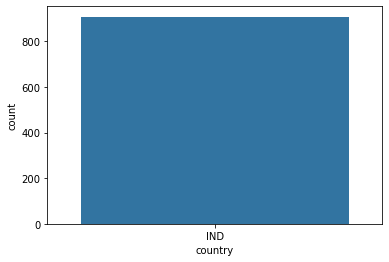

In [41]:
ax=df['country'].value_counts()
print(ax)
sns.countplot(df['country'])

only one country name i.e.it has only one category it will not meaningful, so we drop this column

In [42]:
df = df.drop(['country'], axis=1)

India    908
Name: country_long, dtype: int64


<AxesSubplot:xlabel='country_long', ylabel='count'>

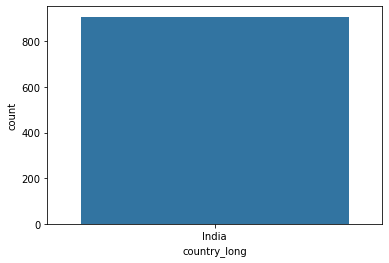

In [43]:
ax=df['country_long'].value_counts()
print(ax)
sns.countplot(df['country_long'])

only one country name i.e.it has only one category it will not meaningful, so we drop this column

In [44]:
df = df.drop(['country_long'], axis=1)

In [45]:
ax=df['name'].value_counts()
print(ax)
#sns.countplot(df['name'])

MAHATMA SUGAR                    1
Pokhran FVE Solar Power Plant    1
Phagi Solar Power Plant          1
JEGURUPADU GT                    1
ANTA GT                          1
                                ..
Kudankulam                       1
KHATIMA                          1
TEESTA LOW DAM -IV               1
JALDHAKA I&II                    1
Deh Solar Power Plant            1
Name: name, Length: 908, dtype: int64


only one value for each name i.e.it has only one category it will not meaningful, so we drop this column


In [46]:

df = df.drop(['name'], axis=1)

In [47]:
ax=df['gppd_idnr'].value_counts()
print(ax)
#sns.countplot(df['gppd_idnr'])

IND0000312    1
WRI1026659    1
IND0000219    1
WRI1019889    1
IND0000209    1
             ..
WRI1026074    1
IND0000016    1
WRI1019964    1
IND0000020    1
IND0000197    1
Name: gppd_idnr, Length: 908, dtype: int64


only one value for each gppd_idnr i.e.it has only one category it will not meaningful, so we drop this column

In [48]:
df = df.drop(['gppd_idnr'], axis=1)

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

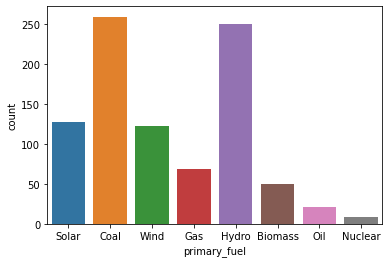

In [49]:
ax=df['primary_fuel'].value_counts()
print(ax)
sns.countplot(df['primary_fuel'])

from the above observation it is showing that types of fuel

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Rswm Rswm ltd                                  1
Binani Industries ltd                          1
Varam Pvt ltd                                  1
ACME Cleantech Solutions Private Limited       1
Sangam Spinners ltd                            1
Name: source, Length: 191, dtype: int64


<AxesSubplot:xlabel='source', ylabel='count'>

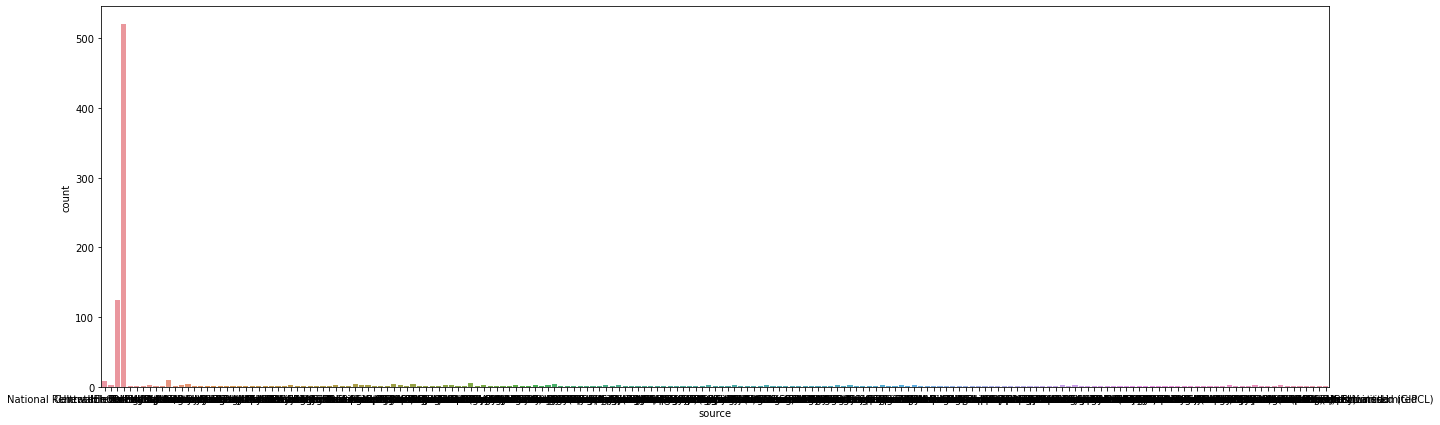

In [50]:
ax=df['source'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['source'])

from the above observation it is showing that Central Electricity Authority has more value counts

http://www.cea.nic.in/                                                              520
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/SGS-UKL1300103078.33/view                          1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
https://cdm.unfccc.int/Projects/DB/RWTUV1285157251.43/view                            1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351859167.83/view                          1
http://www.ril.com/                                                                   1
Name: url, Length: 304, dtype: i

<AxesSubplot:xlabel='url', ylabel='count'>

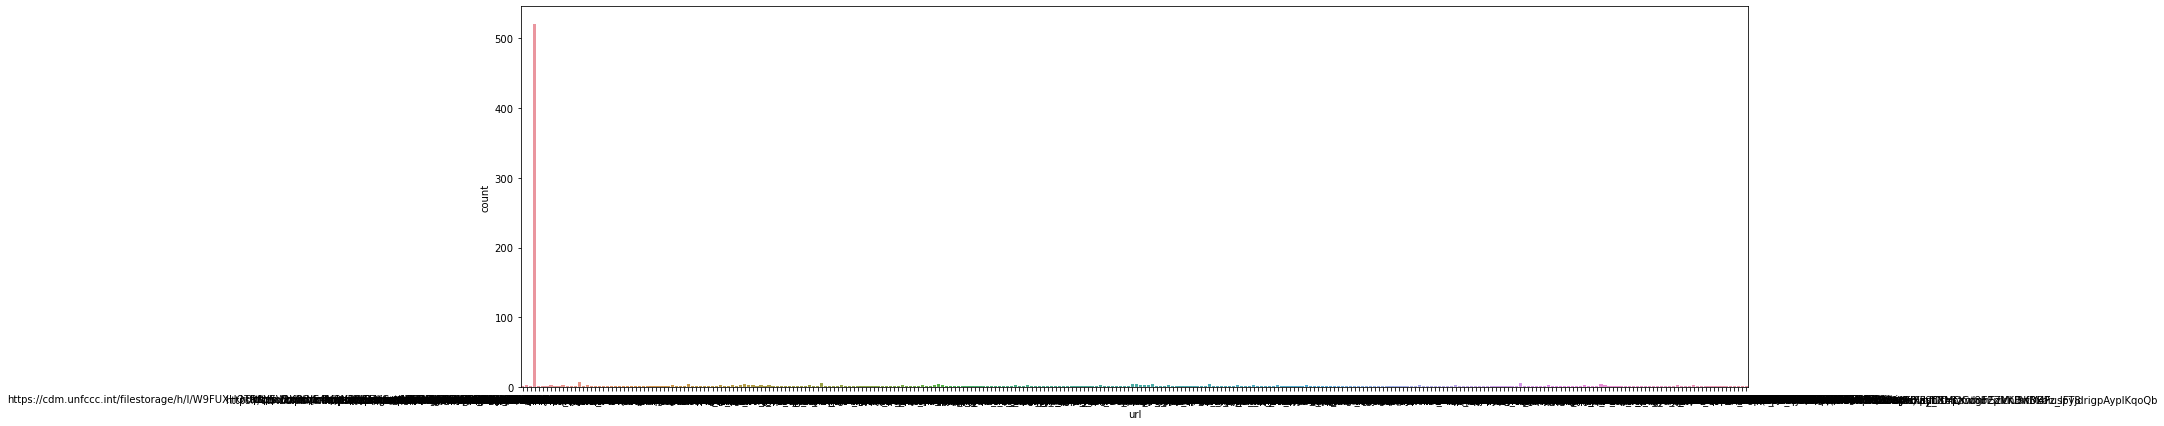

In [51]:
ax=df['url'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['url'])

from the above observation it is showing that http://www.cea.nic.in/  has more value counts

280    566
5        4
234      4
108      4
257      3
      ... 
170      1
169      1
168      1
166      1
0        1
Name: owner, Length: 281, dtype: int64


<AxesSubplot:xlabel='owner', ylabel='count'>

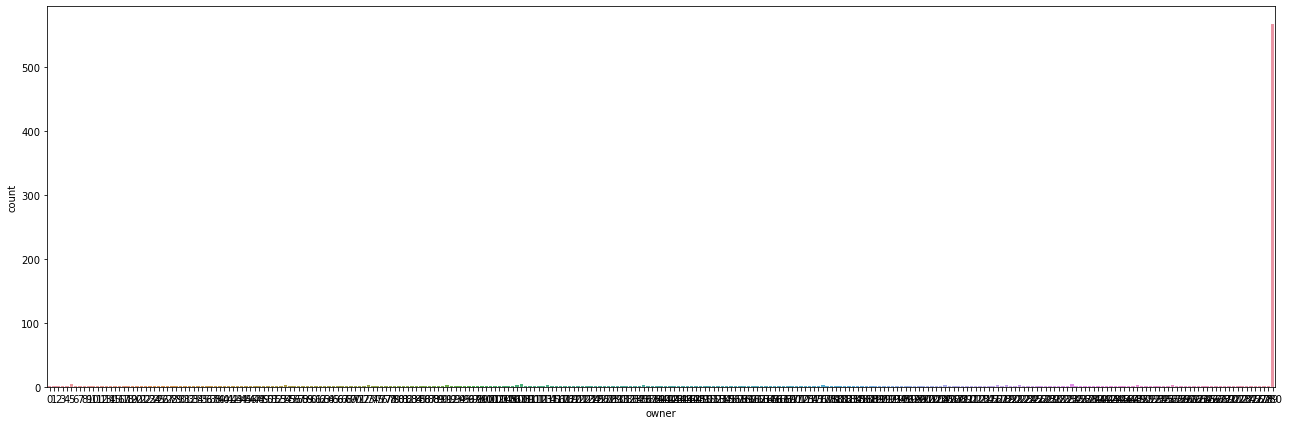

In [52]:
ax=df['owner'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['owner'])

In [53]:
df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [54]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
owner                    int32
source                  object
url                     object
geolocation_source       int32
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

In [55]:
lencoder=LabelEncoder()
df['primary_fuel']=lencoder.fit_transform(df['primary_fuel'])
df['source']=lencoder.fit_transform(df['source'])
df['url']=lencoder.fit_transform(df['url'])
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,2004.000000,280,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.000000,280,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.000000,280,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,15.2758,75.5811,7,1996.876894,280,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,24.3500,73.7477,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


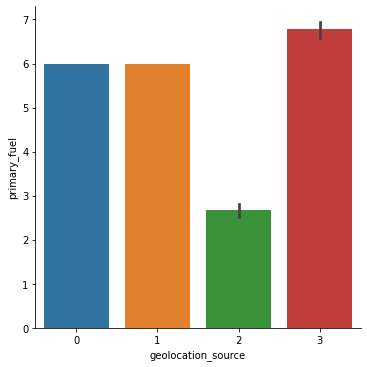

In [56]:
g=sns.catplot(y='primary_fuel',x='geolocation_source',data=df,kind='bar')
plt.show()

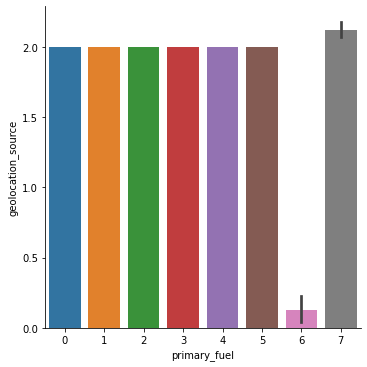

In [57]:
g=sns.catplot(x='primary_fuel',y='geolocation_source',data=df,kind='bar')
plt.show()

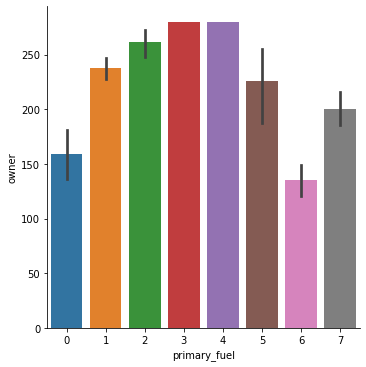

In [58]:
g=sns.catplot(x='primary_fuel',y='owner',data=df,kind='bar')
plt.show()

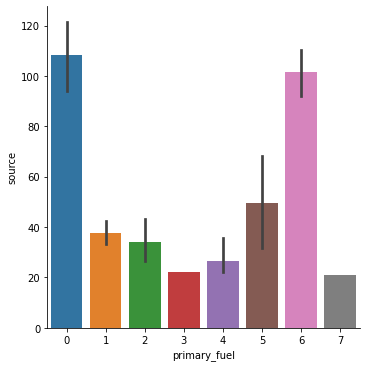

In [59]:
g=sns.catplot(x='primary_fuel',y='source',data=df,kind='bar')
plt.show()

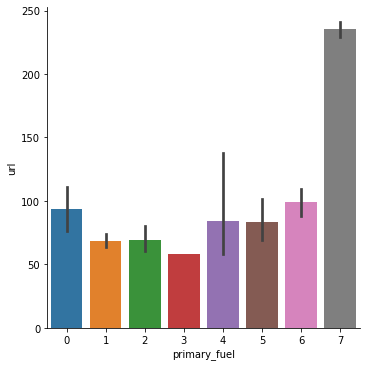

In [60]:
g=sns.catplot(x='primary_fuel',y='url',data=df,kind='bar')
plt.show()

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

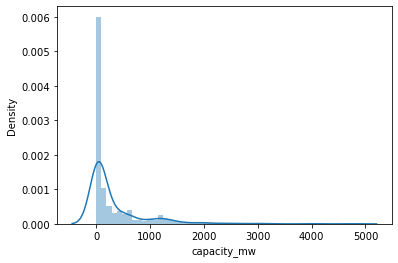

In [61]:
sns.distplot(df['capacity_mw'],kde=True)

capacity_mw data is maximum in the range from 0 to 2000

<AxesSubplot:xlabel='latitude', ylabel='Density'>

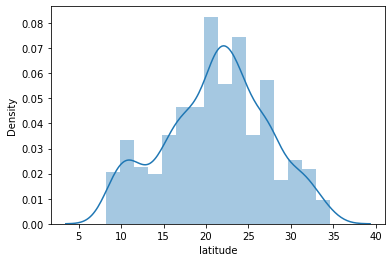

In [62]:
sns.distplot(df['latitude'],kde=True)

from the above observation it is observed that this data is ranges from 8 to 34 

<AxesSubplot:xlabel='longitude', ylabel='Density'>

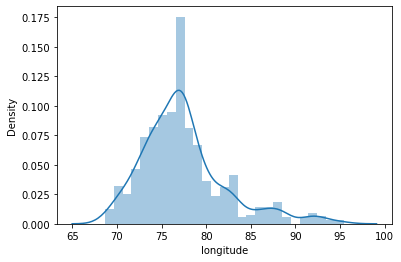

In [63]:
sns.distplot(df['longitude'],kde=True)

from the above observation it is observed that this data is ranges from 68 to 100

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

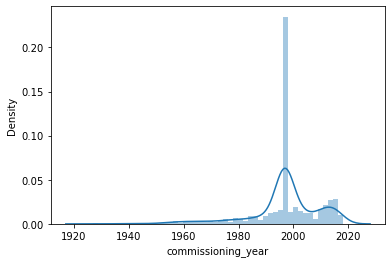

In [64]:
sns.distplot(df['commissioning_year'],kde=True)

In the commissioning_year column ,the data is more in the year 2000

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

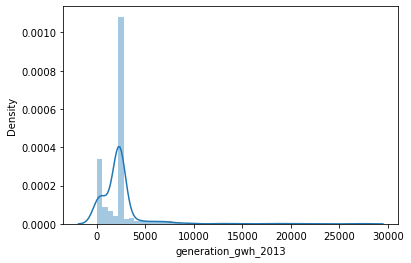

In [65]:
sns.distplot(df['generation_gwh_2013'],kde=True)

from the above observation it is observed that the generation_gwh_2013 column is varied from 0 to 100000 

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

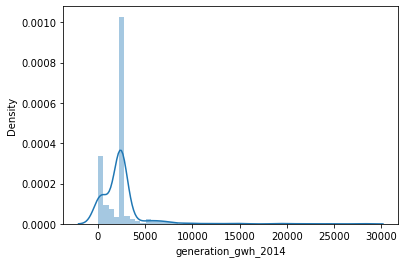

In [66]:
sns.distplot(df['generation_gwh_2014'],kde=True)

from the above observation it is observed that the generation_gwh_2014 column is varied from 0 to 100000 and maximum at 3000

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

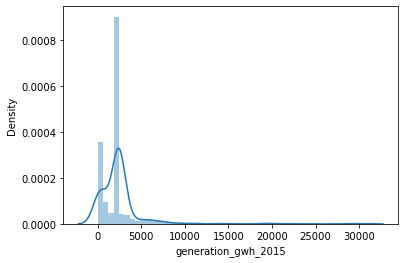

In [67]:
sns.distplot(df['generation_gwh_2015'],kde=True)

from the above observation it is observed that the generation_gwh_2015 column is varied from 0 to 10000 and maximum at 3000

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

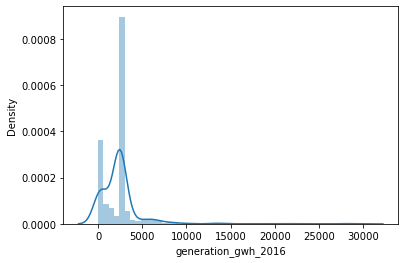

In [68]:
sns.distplot(df['generation_gwh_2016'],kde=True)

from the above observation it is observed that the generation_gwh_2016 column is varied from 0 to 10000 and maximum at 4000

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

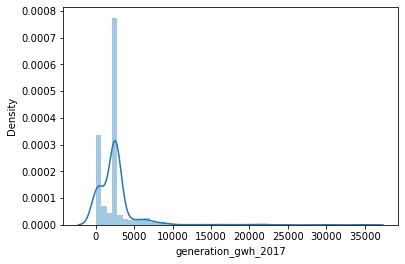

In [69]:
sns.distplot(df['generation_gwh_2017'],kde=True)

from the above observation it is observed that the generation_gwh_2017 column is varied from 0 to 10000 and maximum at 3000

In [70]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,3.205947,1996.876894,227.534141,43.823789,94.429515,1.754405,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.781201,2.281339,12.994825,83.895877,44.624092,70.352824,0.699844,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1.000000,1996.876894,188.750000,22.000000,58.000000,2.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.978950,3.000000,1996.876894,280.000000,22.000000,58.000000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,6.000000,2003.000000,280.000000,29.250000,115.250000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,7.000000,2018.000000,280.000000,190.000000,303.000000,3.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In some column there is too much difference between 75% and maximum values

In [72]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.049790,0.197124,-0.377783,0.265827,3.036718e-01,-2.417009e-01,-2.431764e-01,1.832864e-01,6.678419e-01,7.054341e-01,7.220814e-01,7.528288e-01,7.670398e-01
latitude,0.049790,1.000000,0.031501,-0.013453,0.095050,7.033301e-03,5.594280e-02,-1.306189e-01,-1.779492e-01,3.663949e-02,4.408464e-02,3.612730e-02,3.093239e-02,3.065498e-02
longitude,0.197124,0.031501,1.000000,-0.348710,0.086054,2.778876e-01,-2.390075e-01,-3.030540e-01,2.441165e-01,1.402097e-02,1.166872e-02,1.917647e-02,3.975774e-02,4.040690e-02
primary_fuel,-0.377783,-0.013453,-0.348710,1.000000,-0.123060,-2.601736e-01,5.360860e-02,5.893477e-01,-4.199115e-01,-1.205116e-01,-1.249997e-01,-1.251376e-01,-1.313584e-01,-1.321741e-01
commissioning_year,0.265827,0.095050,0.086054,-0.123060,1.000000,-2.166954e-02,2.183213e-02,1.106422e-02,6.061649e-04,1.108482e-01,1.343054e-01,1.493040e-01,1.726976e-01,1.734004e-01
owner,0.303672,0.007033,0.277888,-0.260174,-0.021670,1.000000e+00,-2.438403e-01,-1.909603e-01,3.983410e-01,-4.798636e-17,-3.967998e-17,2.878648e-17,3.868733e-17,1.421944e-16
source,-0.241701,0.055943,-0.239008,0.053609,0.021832,-2.438403e-01,1.000000e+00,1.603791e-01,-4.920752e-01,1.148485e-16,1.129442e-17,3.266585e-17,2.296820e-17,-1.191072e-16
url,-0.243176,-0.130619,-0.303054,0.589348,0.011064,-1.909603e-01,1.603791e-01,1.000000e+00,3.083010e-02,-1.030115e-17,4.521930e-17,-3.085652e-17,-6.067859e-17,-1.187921e-16
geolocation_source,0.183286,-0.177949,0.244116,-0.419911,0.000606,3.983410e-01,-4.920752e-01,3.083010e-02,1.000000e+00,8.405905e-17,-1.363772e-16,1.912724e-17,1.096812e-16,1.456267e-16
generation_gwh_2013,0.667842,0.036639,0.014021,-0.120512,0.110848,-4.798636e-17,1.148485e-16,-1.030115e-17,8.405905e-17,1.000000e+00,9.634535e-01,8.963761e-01,8.735420e-01,8.306385e-01


<AxesSubplot:>

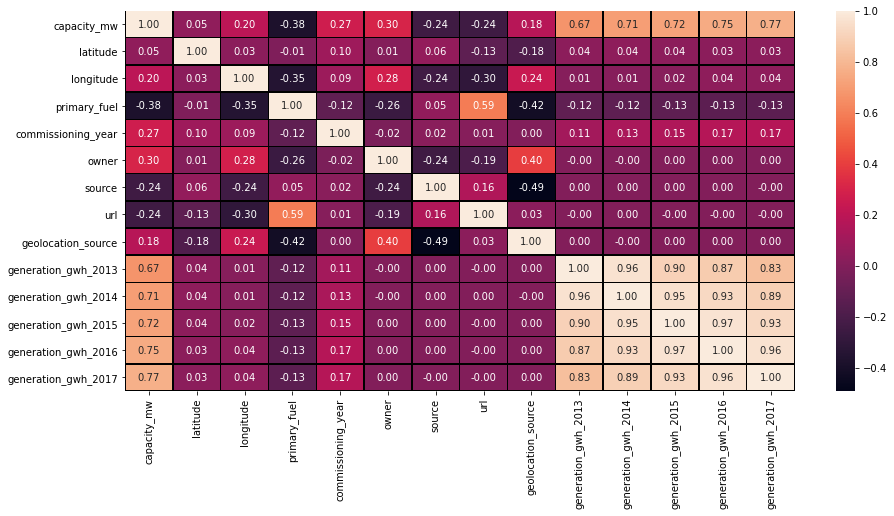

In [73]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


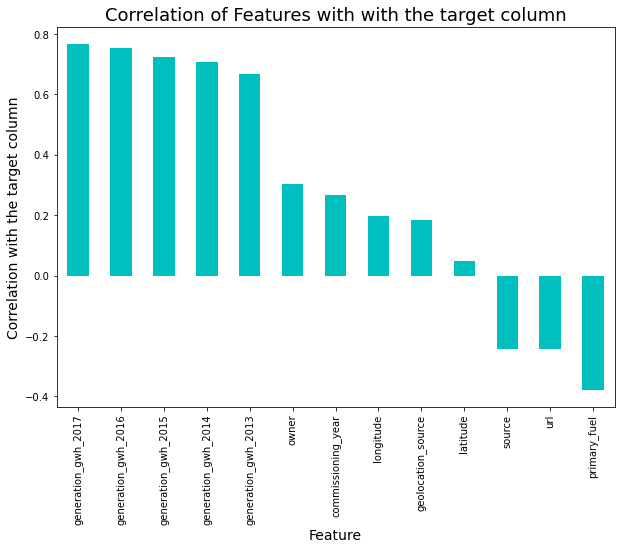

In [74]:
plt.figure(figsize=(10,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()


# If we consider 'primary_fuel' as target column

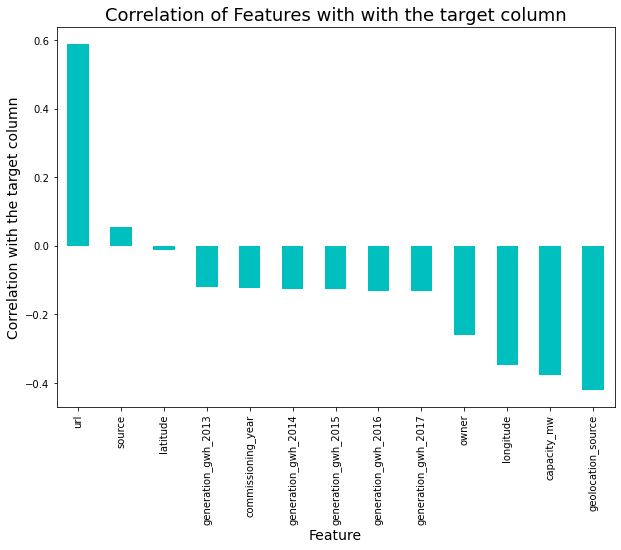

In [75]:
plt.figure(figsize=(10,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()


multi collinearity is present hence we have to remove it.

In [76]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,2004.000000,280,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.000000,280,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [77]:
dfy1=df.iloc[:,0:1]
dfy1

,capacity_mw
0,2.5
1,98.0
2,39.2
3,135.0
4,1800.0
...,...
903,1600.0
904,3.0
905,25.5
906,80.0


In [78]:
dfx1=df.copy()
dfx1.drop("capacity_mw",axis=1,inplace=True)
dfx1

,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,24.7663,74.6090,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,23.8712,91.3602,2,2004.000000,280,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,21.9603,82.4091,1,2015.000000,280,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,1,2016.000000,280,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,12.8932,78.1654,6,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,15.2758,75.5811,7,1996.876894,280,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,24.3500,73.7477,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [79]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [81]:
calc_vif(dfx1)

,variables,VIF_Factor
0,latitude,13.962775
1,longitude,332.883148
2,primary_fuel,8.582935
3,commissioning_year,388.892301
4,owner,10.764212
5,source,3.466095
6,url,6.745270
7,geolocation_source,19.741563
8,generation_gwh_2013,29.370869
9,generation_gwh_2014,62.160141


commissioning_year is having high vif---> 388.892301 hence we drop it

In [82]:
dfx1.drop(["commissioning_year"],axis=1,inplace=True)

In [83]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [84]:
calc_vif(dfx1)

,variables,VIF_Factor
0,latitude,13.446251
1,longitude,46.900806
2,primary_fuel,7.635814
3,owner,10.734653
4,source,3.092377
5,url,6.744634
6,geolocation_source,18.673265
7,generation_gwh_2013,29.370828
8,generation_gwh_2014,62.123343
9,generation_gwh_2015,47.533980


generation_gwh_2014 is having high vif -->62.123343 hence we drop it.

In [85]:
dfx1.drop(["generation_gwh_2014"],axis=1,inplace=True)

In [86]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [87]:
calc_vif(dfx1)

,variables,VIF_Factor
0,latitude,13.415788
1,longitude,46.853688
2,primary_fuel,7.635798
3,owner,10.734632
4,source,3.092372
5,url,6.744572
6,geolocation_source,18.671911
7,generation_gwh_2013,9.587114
8,generation_gwh_2015,34.130274
9,generation_gwh_2016,57.362070


generation_gwh_2016 is having high vif--> 57.362070 hence we drop it

In [88]:
dfx1.drop(["generation_gwh_2016"],axis=1,inplace=True)

In [89]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [90]:
calc_vif(dfx1)

,variables,VIF_Factor
0,latitude,13.403880
1,longitude,46.784729
2,primary_fuel,7.626764
3,owner,10.734367
4,source,3.091009
5,url,6.741252
6,geolocation_source,18.652795
7,generation_gwh_2013,9.536511
8,generation_gwh_2015,19.616857
9,generation_gwh_2017,12.796232


In [91]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,2004.000000,280,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.000000,280,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [92]:
dfx2=df.copy()
dfx2.drop("primary_fuel",axis=1,inplace=True)
dfx2

,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2004.000000,280,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,2015.000000,280,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2016.000000,280,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,15.2758,75.5811,1996.876894,280,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,24.3500,73.7477,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [93]:
dfy2=df.iloc[:,3:4]
dfy2

,primary_fuel
0,6
1,1
2,7
3,2
4,1
...,...
903,1
904,6
905,7
906,1


In [94]:
def calc_vif(dfx2):
    vif=pd.DataFrame()
    vif['variables']=dfx2.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx2.values,i) for i in range(dfx2.shape[1])]
    return(vif)

In [95]:
calc_vif(dfx2)

,variables,VIF_Factor
0,capacity_mw,5.098800
1,latitude,13.964742
2,longitude,327.357616
3,commissioning_year,346.363246
4,owner,12.304261
5,source,2.892375
6,url,3.701482
7,geolocation_source,11.794079
8,generation_gwh_2013,29.415341
9,generation_gwh_2014,62.165855


commissioning_year is having high vif-->346.363246 hence we drop it

In [96]:
dfx2.drop(["commissioning_year"],axis=1,inplace=True)

In [97]:
def calc_vif(dfx2):
    vif=pd.DataFrame()
    vif['variables']=dfx2.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx2.values,i) for i in range(dfx2.shape[1])]
    return(vif)

In [98]:
calc_vif(dfx2)

,variables,VIF_Factor
0,capacity_mw,5.093133
1,latitude,13.416560
2,longitude,35.750715
3,owner,12.300867
4,source,2.782745
5,url,3.338512
6,geolocation_source,11.782711
7,generation_gwh_2013,29.415058
8,generation_gwh_2014,62.133234
9,generation_gwh_2015,47.686289


generation_gwh_2014 is having high vif---62.133234 hence we drop it

In [99]:
dfx2.drop(["generation_gwh_2014"],axis=1,inplace=True)

In [100]:
def calc_vif(dfx2):
    vif=pd.DataFrame()
    vif['variables']=dfx2.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx2.values,i) for i in range(dfx2.shape[1])]
    return(vif)

In [101]:
calc_vif(dfx2)

,variables,VIF_Factor
0,capacity_mw,5.092312
1,latitude,13.386441
2,longitude,35.706114
3,owner,12.300730
4,source,2.782671
5,url,3.338346
6,geolocation_source,11.781222
7,generation_gwh_2013,9.658327
8,generation_gwh_2015,34.246043
9,generation_gwh_2016,57.680289


generation_gwh_2016 is having high vif-->57.680289

In [102]:
dfx2.drop(["generation_gwh_2016"],axis=1,inplace=True)

In [103]:
def calc_vif(dfx2):
    vif=pd.DataFrame()
    vif['variables']=dfx2.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx2.values,i) for i in range(dfx2.shape[1])]
    return(vif)

In [104]:
calc_vif(dfx2)

,variables,VIF_Factor
0,capacity_mw,5.058227
1,latitude,13.372084
2,longitude,35.660524
3,owner,12.284821
4,source,2.782208
5,url,3.336644
6,geolocation_source,11.777562
7,generation_gwh_2013,9.616702
8,generation_gwh_2015,19.619134
9,generation_gwh_2017,16.088074


In [105]:
df.skew()

capacity_mw            3.193257
latitude              -0.147391
longitude              1.129836
primary_fuel           0.471141
commissioning_year    -1.383330
owner                 -1.375607
source                 1.829145
url                    1.512258
geolocation_source    -1.922080
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
dtype: float64

From the above observation all the  columns falls under high skewness except latitude and primary_fuel 
hence we need to remove the skewness

In [106]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

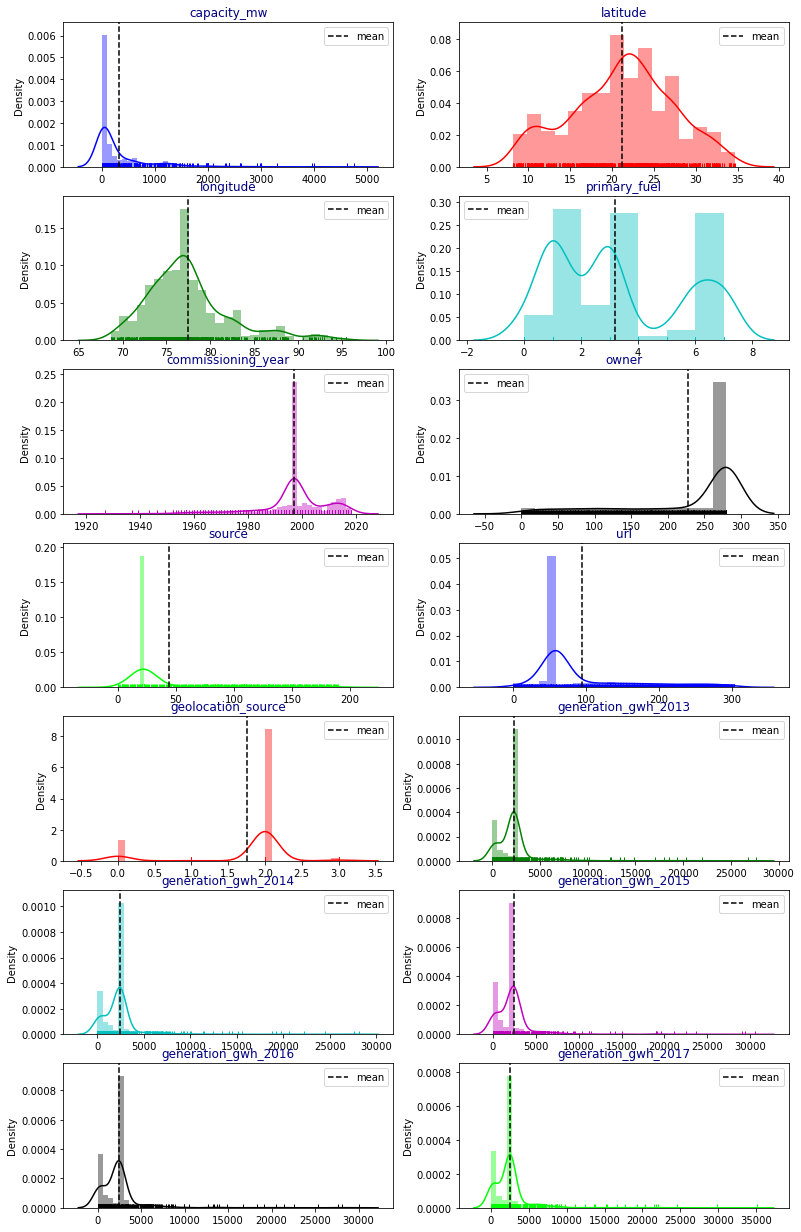

In [107]:
import itertools

cols = ['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(8,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

from the above plot some outliers are present.

### Plotting Outliers 

<AxesSubplot:>

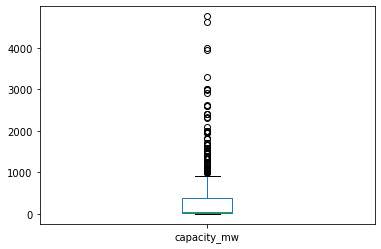

In [108]:
df['capacity_mw'].plot.box()

<AxesSubplot:>

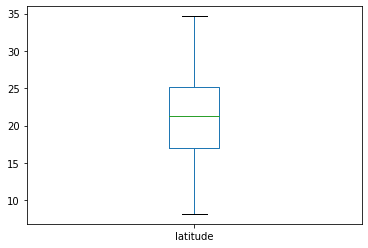

In [109]:
df['latitude'].plot.box()

<AxesSubplot:>

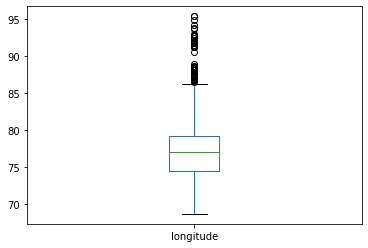

In [110]:
df['longitude'].plot.box()

<AxesSubplot:>

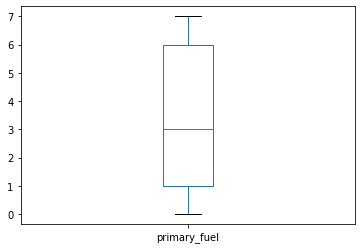

In [111]:
df['primary_fuel'].plot.box()

<AxesSubplot:>

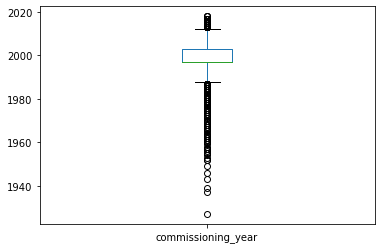

In [112]:
df['commissioning_year'].plot.box()

<AxesSubplot:>

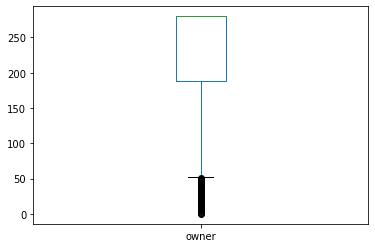

In [113]:
df['owner'].plot.box()

<AxesSubplot:>

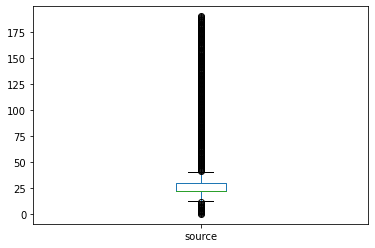

In [114]:
df['source'].plot.box()

<AxesSubplot:>

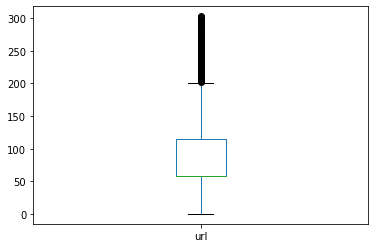

In [115]:
df['url'].plot.box()

<AxesSubplot:>

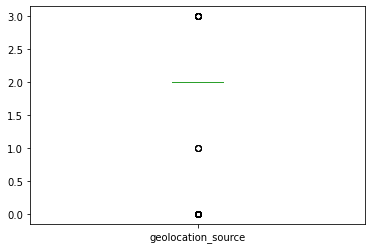

In [116]:
df['geolocation_source'].plot.box()

<AxesSubplot:>

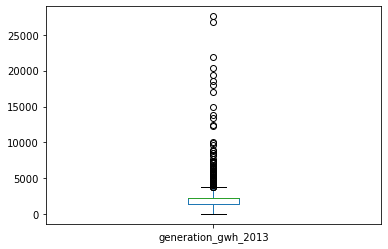

In [117]:
df['generation_gwh_2013'].plot.box()

<AxesSubplot:>

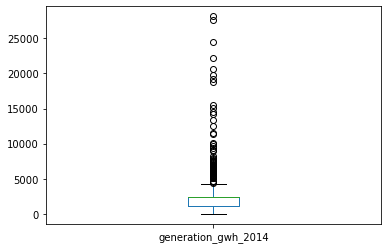

In [118]:
df['generation_gwh_2014'].plot.box()

<AxesSubplot:>

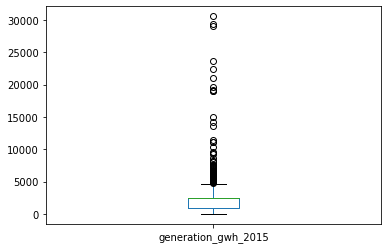

In [119]:
df['generation_gwh_2015'].plot.box()

<AxesSubplot:>

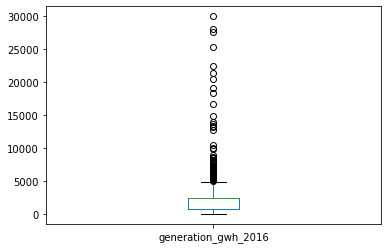

In [120]:
df['generation_gwh_2016'].plot.box()

<AxesSubplot:>

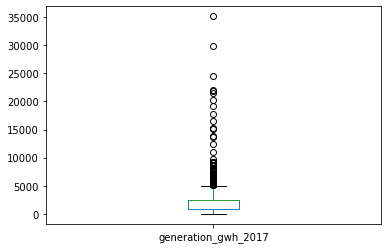

In [121]:
df['generation_gwh_2017'].plot.box()

from the above plot it is observed that some outliers are present

### Removing Outliers

In [122]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 15,  15,  15,  15,  72,  81, 144, 144, 144, 144, 144, 144, 159,
        159, 180, 184, 192, 210, 210, 210, 210, 210, 210, 222, 240, 245,
        300, 309, 309, 309, 309, 309, 309, 322, 324, 334, 341, 343, 346,
        361, 364, 365, 365, 365, 365, 365, 365, 372, 376, 389, 417, 428,
        445, 455, 479, 483, 485, 494, 494, 494, 494, 494, 494, 495, 495,
        495, 495, 495, 495, 500, 520, 530, 533, 539, 542, 547, 575, 584,
        602, 622, 639, 649, 649, 649, 649, 649, 649, 658, 658, 658, 658,
        658, 658, 662, 670, 690, 696, 696, 696, 696, 696, 707, 710, 722,
        722, 722, 722, 725, 725, 725, 725, 725, 727, 727, 727, 727, 727,
        727, 729, 787, 787, 787, 787, 787, 787, 789, 808, 809, 809, 809,
        809, 809, 819, 833, 848, 849, 849, 871, 872, 880, 881, 881, 881,
        881, 881, 881, 896, 901], dtype=int64),
 array([ 0, 11, 12, 13,  6,  6,  0,  9, 10, 11, 12, 13,  9, 10,  2,  2,  6,
         0,  9, 10, 11, 12, 13,  4,  2,  2,  6,  0,  9, 10, 11, 12, 13,  

In [123]:
df_new=df[(z<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,2004.000000,280,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.000000,280,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.000000,280,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,15.2758,75.5811,7,1996.876894,280,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,24.3500,73.7477,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [124]:
dfx1

,latitude,longitude,primary_fuel,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2015,generation_gwh_2017
0,28.1839,73.2407,6,229,109,128,1,2304.059202,2414.072373,2531.754458
1,24.7663,74.6090,1,258,174,173,2,2304.059202,2414.072373,2531.754458
2,21.9038,69.3732,7,2,21,205,2,2304.059202,2414.072373,2531.754458
3,23.8712,91.3602,2,280,22,58,2,631.777928,843.747000,663.774500
4,21.9603,82.4091,1,280,22,58,2,1668.290000,5916.370000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,1,280,22,58,2,2304.059202,0.994875,865.400000
904,12.8932,78.1654,6,114,77,22,0,2304.059202,2414.072373,2531.754458
905,15.2758,75.5811,7,280,21,260,2,2304.059202,2414.072373,2531.754458
906,24.3500,73.7477,1,91,59,82,2,2304.059202,2414.072373,2531.754458


In [125]:
dfx1['capacity_mw'] = dfy1
dfx1

,latitude,longitude,primary_fuel,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2015,generation_gwh_2017,capacity_mw
0,28.1839,73.2407,6,229,109,128,1,2304.059202,2414.072373,2531.754458,2.5
1,24.7663,74.6090,1,258,174,173,2,2304.059202,2414.072373,2531.754458,98.0
2,21.9038,69.3732,7,2,21,205,2,2304.059202,2414.072373,2531.754458,39.2
3,23.8712,91.3602,2,280,22,58,2,631.777928,843.747000,663.774500,135.0
4,21.9603,82.4091,1,280,22,58,2,1668.290000,5916.370000,5385.579736,1800.0
...,...,...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,1,280,22,58,2,2304.059202,0.994875,865.400000,1600.0
904,12.8932,78.1654,6,114,77,22,0,2304.059202,2414.072373,2531.754458,3.0
905,15.2758,75.5811,7,280,21,260,2,2304.059202,2414.072373,2531.754458,25.5
906,24.3500,73.7477,1,91,59,82,2,2304.059202,2414.072373,2531.754458,80.0


In [126]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(dfx1))
threshold=3
np.where(z>3)

(array([ 15,  15,  15,  72,  81, 144, 144, 144, 144, 159, 180, 184, 192,
        210, 210, 210, 210, 240, 245, 300, 309, 309, 309, 309, 322, 324,
        334, 341, 346, 361, 364, 365, 365, 365, 365, 376, 389, 417, 428,
        483, 494, 494, 494, 494, 495, 495, 495, 495, 500, 520, 530, 533,
        547, 639, 649, 649, 649, 649, 658, 658, 658, 658, 662, 670, 690,
        696, 696, 696, 722, 722, 725, 725, 725, 727, 727, 727, 727, 787,
        787, 787, 787, 789, 809, 809, 809, 819, 833, 848, 849, 871, 872,
        880, 881, 881, 881, 881, 896, 901], dtype=int64),
 array([ 8,  9, 10,  4,  4,  7,  8,  9, 10,  7,  1,  1,  4,  7,  8,  9, 10,
         1,  1,  4,  7,  8,  9, 10,  4,  1,  1,  1,  4,  1, 10,  7,  8,  9,
        10, 10,  1,  1,  1, 10,  7,  8,  9, 10,  7,  8,  9, 10,  1,  1,  1,
         7,  1,  1,  7,  8,  9, 10,  7,  8,  9, 10,  4,  4,  4,  8,  9, 10,
         7,  8,  7,  8,  9,  7,  8,  9, 10,  7,  8,  9, 10, 10,  8,  9, 10,
         1,  4,  1,  1,  4,  4,  4,  7,  8,  9, 10,

In [127]:
dfx1_new=dfx1[(z<3).all(axis=1)]
dfx1_new

,latitude,longitude,primary_fuel,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2015,generation_gwh_2017,capacity_mw
0,28.1839,73.2407,6,229,109,128,1,2304.059202,2414.072373,2531.754458,2.5
1,24.7663,74.6090,1,258,174,173,2,2304.059202,2414.072373,2531.754458,98.0
2,21.9038,69.3732,7,2,21,205,2,2304.059202,2414.072373,2531.754458,39.2
3,23.8712,91.3602,2,280,22,58,2,631.777928,843.747000,663.774500,135.0
4,21.9603,82.4091,1,280,22,58,2,1668.290000,5916.370000,5385.579736,1800.0
...,...,...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,1,280,22,58,2,2304.059202,0.994875,865.400000,1600.0
904,12.8932,78.1654,6,114,77,22,0,2304.059202,2414.072373,2531.754458,3.0
905,15.2758,75.5811,7,280,21,260,2,2304.059202,2414.072373,2531.754458,25.5
906,24.3500,73.7477,1,91,59,82,2,2304.059202,2414.072373,2531.754458,80.0


### Percentage loss of data

In [128]:
percentage_loss=((908-852)/908)*100
print(percentage_loss)

6.167400881057269


In [129]:
feature=df.drop("capacity_mw",axis=1)
target=df["capacity_mw"]
x=feature
y=target

In [130]:
x

,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,24.7663,74.6090,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,23.8712,91.3602,2,2004.000000,280,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,21.9603,82.4091,1,2015.000000,280,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,1,2016.000000,280,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,12.8932,78.1654,6,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,15.2758,75.5811,7,1996.876894,280,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,24.3500,73.7477,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [131]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 908, dtype: float64

In [132]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [133]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = mms.fit_transform(feature)
x

array([[0.75585062, 0.1717277 , 0.85714286, ..., 0.07904884, 0.081757  ,
        0.07209689],
       [0.62678766, 0.22285368, 0.14285714, ..., 0.07904884, 0.081757  ,
        0.07209689],
       [0.51868762, 0.02722011, 1.        , ..., 0.07904884, 0.081757  ,
        0.07209689],
       ...,
       [0.26838645, 0.25917581, 1.        , ..., 0.07904884, 0.081757  ,
        0.07209689],
       [0.61106642, 0.19067155, 0.14285714, ..., 0.07904884, 0.081757  ,
        0.07209689],
       [0.06667271, 0.33000788, 1.        , ..., 0.07904884, 0.081757  ,
        0.07209689]])

### Regressor Model Building:

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [135]:
max_scr=0
for i in range(0,4000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)

In [136]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x,y,random_state=53,test_size=0.20)

In [137]:
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)  
  
        
        

Training r2_score is:- 78.3988013787436
Testing r2_score is:- 77.79869451410816


In [138]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('Error:')

print("mean absolute error:",mean_absolute_error(pred_test,y_test))  # no change if we interchange pred and y_test values
print("mean squared error:",mean_squared_error(pred_test,y_test))
print("root mean squared error:",np.sqrt(mean_squared_error(pred_test,y_test)))


Error:
mean absolute error: 173.3476530656821
mean squared error: 65510.26291532518
root mean squared error: 255.949727320279


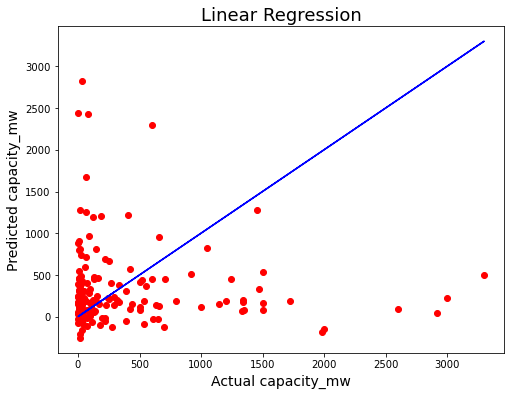

In [139]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_test, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw',fontsize=14)
plt.ylabel('Predicted capacity_mw',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Regularization

In [141]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [142]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls = ls.predict(x_test_b)

lss = r2_score(y_test_b,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 74.85538602426406
R2_score is :- 81.69921179721338


At cv:- 3
Cross validation score is:- 75.60591080447908
R2_score is :- 81.69921179721338


At cv:- 4
Cross validation score is:- 75.12762637537891
R2_score is :- 81.69921179721338


At cv:- 5
Cross validation score is:- 75.84753233661863
R2_score is :- 81.69921179721338


At cv:- 6
Cross validation score is:- 75.09005188514176
R2_score is :- 81.69921179721338


At cv:- 7
Cross validation score is:- 75.48137080362
R2_score is :- 81.69921179721338


At cv:- 8
Cross validation score is:- 75.695146194941
R2_score is :- 81.69921179721338


At cv:- 9
Cross validation score is:- 74.79437807919197
R2_score is :- 81.69921179721338




In [143]:
print("At cv:-",5)
print("Cross validation score is:-",75.847 )
print("R2_score is :-",81.699)

At cv:- 5
Cross validation score is:- 75.847
R2_score is :- 81.699


In [144]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error:
Mean Absolute Error: 177.77418447490552
Mean Squared Error: 61782.49061080318
Root Mean Square Error: 248.56083885198646


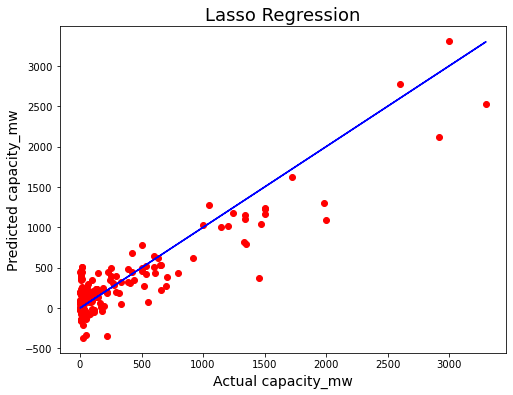

In [145]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_ls, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw',fontsize=14)
plt.ylabel('Predicted capacity_mw',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

In [146]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [147]:
rd = Ridge(alpha=0.1, copy_X= True, fit_intercept= True, normalize=False, random_state= 0, tol= 0.001)
rd.fit(x_train_b,y_train_b)
rd.score(x_train_b,y_train_b)
pred_rd = rd.predict(x_test_b)

rds = r2_score(y_test_b,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x,y,cv=5)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 81.60642541279569
Cross Val Score: 75.64391075534604


In [148]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_rd)))

Error:
Mean Absolute Error: 179.13617155115477
Mean Squared Error: 62095.73252478937
Root Mean Square Error: 249.19015334637396


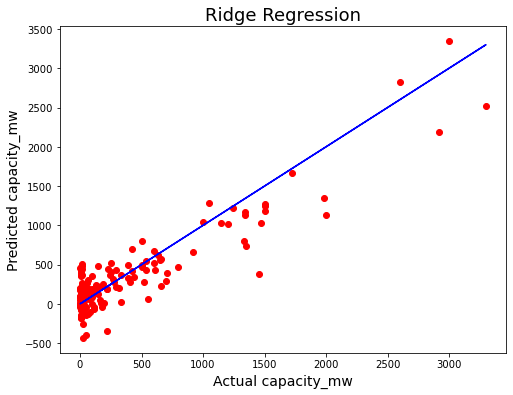

In [149]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_rd, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw',fontsize=14)
plt.ylabel('Predicted capacity_mw',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()


### Ensemble Techniques

In [150]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'mse', 'splitter': 'random'}


In [151]:
dt = DecisionTreeRegressor(criterion='mae', splitter='random')
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
pred_decision = dt.predict(x_test_b)

dts = r2_score(y_test_b,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=5)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 73.76094191052354
Cross Val Score: 70.30383400097155


In [152]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_decision)))

Error:
Mean Absolute Error: 140.01315384615384
Mean Squared Error: 88581.66883776923
Root Mean Square Error: 297.62672735789243


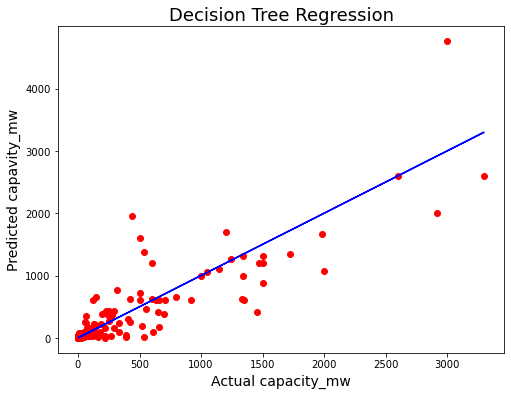

In [153]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_decision, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw',fontsize=14)
plt.ylabel('Predicted capavity_mw',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

In [154]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'mse', 'loss': 'lad', 'n_estimators': 200}


In [155]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(criterion='mse',loss='huber',n_estimators=100)
gbr.fit(x_train_b, y_train_b)
gbr.score(x_train_b, y_train_b)
pred_random = gbr.predict(x_test_b)

gbrs= r2_score(y_test_b,pred_random)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,x,y,cv=5)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

R2 Score: 92.29034735917682
Cross Val Score: 84.25867375336983


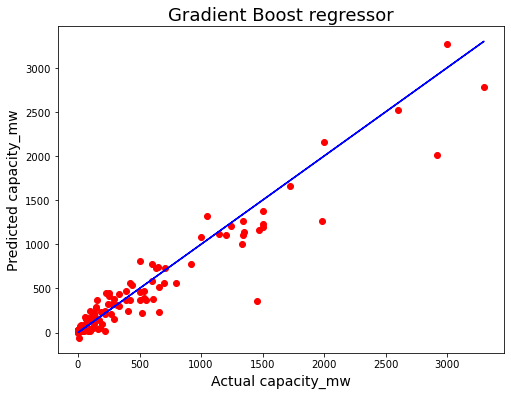

In [156]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw',fontsize=14)
plt.ylabel('Predicted capacity_mw',fontsize=14)
plt.title('Gradient Boost regressor',fontsize=18)
plt.show()

In [157]:
import xgboost
print(xgboost.__version__)

1.4.2


In [158]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor


In [159]:
xgb = XGBRegressor()
xgb.fit(x_train_b,y_train_b)
xgb = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
# define model evaluation method
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xgb, x, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: nan (nan)


In [160]:
xgb = XGBRegressor()
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(x_train_b, y_train_b)
xgb.score(x_train_b, y_train_b)
pred_random = xgb.predict(x_test_b)

xgbs= r2_score(y_test_b,pred_random)
print('R2 Score:',xgbs*100)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
xgbscore = cross_val_score(xgb,x,y,cv=5)
xgbc= xgbscore.mean() 
print('Cross Val Score:',xgbc*100)




R2 Score: 90.26878417654935
Cross Val Score: 84.09133295397882


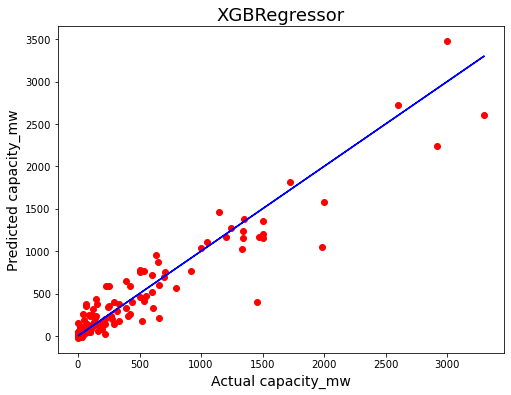

In [161]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw',fontsize=14)
plt.ylabel('Predicted capacity_mw',fontsize=14)
plt.title('XGBRegressor',fontsize=18)
plt.show()

In [162]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train_b,y_train_b)
print("KNR score:",knr.score(x_train_b,y_train_b))

knr_pred=knr.predict(x_test_b)
knrs= r2_score(y_test_b,knr_pred)
print('R2 Score:',knrs*100)
knrscore = cross_val_score(knr,x,y,cv=5)
knrc= knrscore.mean() 
print('Cross Val Score:',knrc*100)


KNR score: 0.9322827630275892
R2 Score: 76.16954344527804
Cross Val Score: 75.54229295952604


In [163]:
print("Mean Squared error:",mean_squared_error(y_test_b,knr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test_b,knr_pred)))

Mean Squared error: 80450.35776760026
Root Mean Squared error: 283.63772275140036


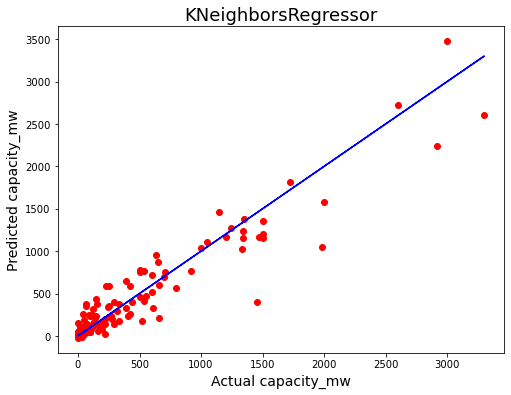

In [164]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw',fontsize=14)
plt.ylabel('Predicted capacity_mw',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=18)
plt.show()

In [165]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train_b,y_train_b)
print("SVR score:",svr.score(x_train_b,y_train_b))

svr_pred=svr.predict(x_test_b)
svrs= r2_score(y_test_b,svr_pred)
print('R2 Score:',svrs*100)
svrscore = cross_val_score(svr,x,y,cv=5)
svrc= svrscore.mean() 
print('Cross Val Score:',svrc*100)

SVR score: -0.13771819368381366
R2 Score: -13.738671326453389
Cross Val Score: -13.52601606896763


In [166]:
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
parameters = {'n_estimators':[50,100,200],'learning_rate':[0.1,1.0,1.5],'loss' : ['linear', 'quare', 'exponential'],'random_state':[0,1,2,3,4,5,6,7,8,9]}

#parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
abr=AdaBoostRegressor()
clf = GridSearchCV(abr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50, 'random_state': 2}


In [167]:
abr= AdaBoostRegressor(learning_rate= 0.1, loss= 'exponential', n_estimators= 50, random_state= 2)
abr.fit(x_train_b, y_train_b)
abr.score(x_train_b, y_train_b)
pred_random = abr.predict(x_test_b)

abrs= r2_score(y_test_b,pred_random)
print('R2 Score:',abrs*100)

abscore = cross_val_score(abr,x,y,cv=5)
abrc= abscore.mean() 
print('Cross Val Score:',abrc*100)

R2 Score: 86.79724529328455
Cross Val Score: 79.67463792654132


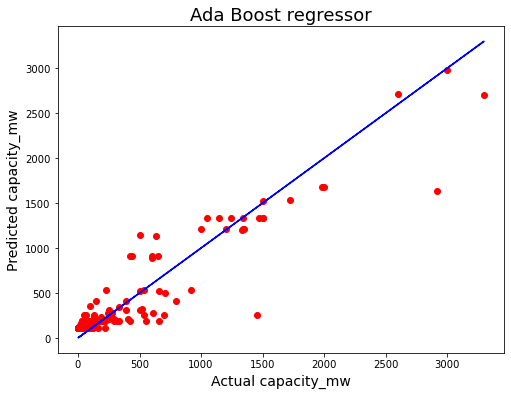

In [168]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw',fontsize=14)
plt.ylabel('Predicted capacity_mw',fontsize=14)
plt.title('Ada Boost regressor',fontsize=18)
plt.show()

In [169]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid']} #'gamma': ['auto', 'scale']
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'kernel': 'poly'}


In [170]:
sv = SVR(kernel = 'poly', gamma = 'auto')
sv.fit(x_train_b, y_train_b)
sv.score(x_train_b, y_train_b)
pred_vector = sv.predict(x_test_b)

svs = r2_score(y_test_b,pred_vector)
print('R2 Score:',svs*100)

svscore = cross_val_score(sv,x,y,cv=5)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: -20.625013808596336
Cross Val Score: -21.62985909530156


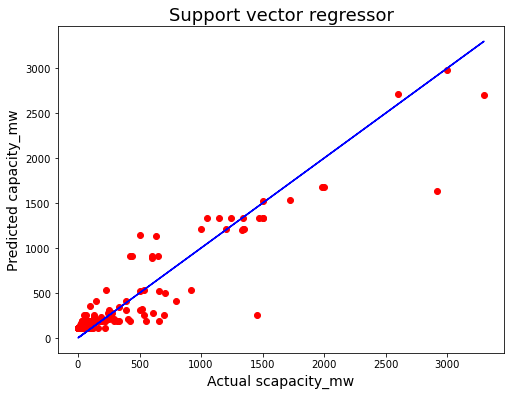

In [171]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual scapacity_mw',fontsize=14)
plt.ylabel('Predicted capacity_mw',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()

R2 Score: 90.26878417654935
Cross Val Score: 84.09133295397882

### Model Saving

In [172]:
import pickle
filename = 'regressor_global_power_plant.pkl'
pickle.dump(xgb,open(filename, 'wb'))

### Conclusion

In [173]:
a=np.array(y_test)
a

array([5.80000e+00, 2.00000e+00, 3.63000e+01, 1.60000e+02, 2.90000e+02,
       6.00000e+02, 6.60000e+02, 1.24000e+03, 1.80000e+01, 3.00000e+02,
       1.60000e+01, 3.88500e+02, 3.32000e+01, 6.26000e+01, 9.00000e+00,
       2.25000e+01, 2.63000e+03, 2.34000e+03, 1.50000e+00, 1.44000e+02,
       4.80000e+02, 1.50000e+03, 2.60000e+03, 2.50000e+02, 4.45000e+02,
       3.92000e+01, 2.70000e+02, 7.20000e+01, 9.50000e+01, 1.20000e+02,
       3.00000e+01, 6.00000e+02, 3.46500e+01, 1.00000e+00, 2.31000e+01,
       6.30000e+01, 4.80000e+00, 1.26000e+03, 1.20000e+02, 1.25000e+01,
       3.30000e+03, 1.60000e+01, 6.10000e+02, 4.40000e+01, 2.56000e+01,
       4.80000e+01, 1.25000e+01, 6.40000e+01, 5.00000e+01, 6.00000e+02,
       2.00000e+00, 1.05000e+01, 2.10000e+01, 3.30500e+02, 2.00000e+01,
       1.20000e+03, 2.50000e+02, 6.50000e+01, 7.89000e+01, 5.00000e+01,
       4.90000e+01, 7.68000e+02, 5.00000e+00, 5.20000e+02, 3.90000e+01,
       4.60000e+02, 6.00000e+02, 2.20000e+02, 6.56000e+01, 3.500

In [174]:
predicted=np.array(xgb.predict(x_test))
predicted

array([ 5.80246830e+00,  1.94591486e+00,  3.62693901e+01,  1.59991333e+02,
        1.42534332e+02,  5.99876709e+02,  6.60005005e+02,  1.27546704e+03,
        1.80237808e+01,  2.99837524e+02,  1.59508066e+01,  3.88527344e+02,
        3.31500092e+01,  6.25338707e+01,  9.09982014e+00,  2.25368919e+01,
        2.62994897e+03,  2.34002319e+03,  1.45586586e+00,  2.33911377e+02,
        4.80021820e+02,  1.20550037e+03,  2.72067480e+03,  2.50011627e+02,
        4.45003754e+02,  1.07088608e+02,  2.69988098e+02,  1.36068100e+02,
        9.50134125e+01,  1.19982895e+02,  3.00904636e+01,  5.99997437e+02,
        3.46596642e+01,  1.02635360e+00,  2.31826687e+01,  6.30224838e+01,
        4.79768562e+00,  1.25999414e+03,  3.14783844e+02,  2.18892765e+01,
        2.61170630e+03,  1.65588322e+01,  3.30644104e+02,  4.39957695e+01,
        2.81669064e+01,  4.80172157e+01,  1.25339222e+01,  6.40136414e+01,
        4.99888954e+01,  6.00036133e+02,  1.99586630e+00,  2.91057148e+01,
        3.93004913e+01,  

In [175]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,5.8,5.802468
1,2.0,1.945915
2,36.3,36.269390
3,160.0,159.991333
4,290.0,142.534332
...,...,...
177,1350.0,1350.001465
178,10.5,10.498149
179,500.0,773.609009
180,510.0,509.989502


In [176]:
dfx2

,capacity_mw,latitude,longitude,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2015,generation_gwh_2017
0,2.5,28.1839,73.2407,229,109,128,1,2304.059202,2414.072373,2531.754458
1,98.0,24.7663,74.6090,258,174,173,2,2304.059202,2414.072373,2531.754458
2,39.2,21.9038,69.3732,2,21,205,2,2304.059202,2414.072373,2531.754458
3,135.0,23.8712,91.3602,280,22,58,2,631.777928,843.747000,663.774500
4,1800.0,21.9603,82.4091,280,22,58,2,1668.290000,5916.370000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,280,22,58,2,2304.059202,0.994875,865.400000
904,3.0,12.8932,78.1654,114,77,22,0,2304.059202,2414.072373,2531.754458
905,25.5,15.2758,75.5811,280,21,260,2,2304.059202,2414.072373,2531.754458
906,80.0,24.3500,73.7477,91,59,82,2,2304.059202,2414.072373,2531.754458


In [177]:
dfx2['primary_fuel'] = dfy2
dfx2

,capacity_mw,latitude,longitude,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2015,generation_gwh_2017,primary_fuel
0,2.5,28.1839,73.2407,229,109,128,1,2304.059202,2414.072373,2531.754458,6
1,98.0,24.7663,74.6090,258,174,173,2,2304.059202,2414.072373,2531.754458,1
2,39.2,21.9038,69.3732,2,21,205,2,2304.059202,2414.072373,2531.754458,7
3,135.0,23.8712,91.3602,280,22,58,2,631.777928,843.747000,663.774500,2
4,1800.0,21.9603,82.4091,280,22,58,2,1668.290000,5916.370000,5385.579736,1
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,280,22,58,2,2304.059202,0.994875,865.400000,1
904,3.0,12.8932,78.1654,114,77,22,0,2304.059202,2414.072373,2531.754458,6
905,25.5,15.2758,75.5811,280,21,260,2,2304.059202,2414.072373,2531.754458,7
906,80.0,24.3500,73.7477,91,59,82,2,2304.059202,2414.072373,2531.754458,1


In [178]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(dfx2))
threshold=3
np.where(z>3)

(array([ 15,  15,  15,  72,  81, 144, 144, 144, 144, 159, 180, 184, 192,
        210, 210, 210, 210, 240, 245, 300, 309, 309, 309, 309, 322, 324,
        334, 341, 346, 361, 364, 365, 365, 365, 365, 376, 389, 417, 428,
        483, 494, 494, 494, 494, 495, 495, 495, 495, 500, 520, 530, 533,
        547, 639, 649, 649, 649, 649, 658, 658, 658, 658, 662, 670, 690,
        696, 696, 696, 722, 722, 725, 725, 725, 727, 727, 727, 727, 787,
        787, 787, 787, 789, 809, 809, 809, 819, 833, 848, 849, 871, 872,
        880, 881, 881, 881, 881, 896, 901], dtype=int64),
 array([0, 8, 9, 4, 4, 0, 7, 8, 9, 7, 2, 2, 4, 0, 7, 8, 9, 2, 2, 4, 0, 7,
        8, 9, 4, 2, 2, 2, 4, 2, 0, 0, 7, 8, 9, 0, 2, 2, 2, 0, 0, 7, 8, 9,
        0, 7, 8, 9, 2, 2, 2, 7, 2, 2, 0, 7, 8, 9, 0, 7, 8, 9, 4, 4, 4, 0,
        8, 9, 7, 8, 7, 8, 9, 0, 7, 8, 9, 0, 7, 8, 9, 0, 0, 8, 9, 2, 4, 2,
        2, 4, 4, 4, 0, 7, 8, 9, 4, 4], dtype=int64))

In [179]:
dfx2_new=dfx1[(z<3).all(axis=1)]
dfx2_new

,latitude,longitude,primary_fuel,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2015,generation_gwh_2017,capacity_mw
0,28.1839,73.2407,6,229,109,128,1,2304.059202,2414.072373,2531.754458,2.5
1,24.7663,74.6090,1,258,174,173,2,2304.059202,2414.072373,2531.754458,98.0
2,21.9038,69.3732,7,2,21,205,2,2304.059202,2414.072373,2531.754458,39.2
3,23.8712,91.3602,2,280,22,58,2,631.777928,843.747000,663.774500,135.0
4,21.9603,82.4091,1,280,22,58,2,1668.290000,5916.370000,5385.579736,1800.0
...,...,...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,1,280,22,58,2,2304.059202,0.994875,865.400000,1600.0
904,12.8932,78.1654,6,114,77,22,0,2304.059202,2414.072373,2531.754458,3.0
905,15.2758,75.5811,7,280,21,260,2,2304.059202,2414.072373,2531.754458,25.5
906,24.3500,73.7477,1,91,59,82,2,2304.059202,2414.072373,2531.754458,80.0


### Percentage loss of data

In [180]:
percentage_loss=((908-852)/908)*100
print(percentage_loss)

6.167400881057269


In [181]:
feature=dfx2.drop("primary_fuel",axis=1)
target=dfx2["primary_fuel"]
x=feature
y=target

In [182]:
x

,capacity_mw,latitude,longitude,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2015,generation_gwh_2017
0,2.5,28.1839,73.2407,229,109,128,1,2304.059202,2414.072373,2531.754458
1,98.0,24.7663,74.6090,258,174,173,2,2304.059202,2414.072373,2531.754458
2,39.2,21.9038,69.3732,2,21,205,2,2304.059202,2414.072373,2531.754458
3,135.0,23.8712,91.3602,280,22,58,2,631.777928,843.747000,663.774500
4,1800.0,21.9603,82.4091,280,22,58,2,1668.290000,5916.370000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,280,22,58,2,2304.059202,0.994875,865.400000
904,3.0,12.8932,78.1654,114,77,22,0,2304.059202,2414.072373,2531.754458
905,25.5,15.2758,75.5811,280,21,260,2,2304.059202,2414.072373,2531.754458
906,80.0,24.3500,73.7477,91,59,82,2,2304.059202,2414.072373,2531.754458


In [183]:
y

0      6
1      1
2      7
3      2
4      1
      ..
903    1
904    6
905    7
906    1
907    7
Name: primary_fuel, Length: 908, dtype: int32

In [184]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [185]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = mms.fit_transform(feature)
x

array([[5.25210084e-04, 7.55850620e-01, 1.71727702e-01, ...,
        8.35221669e-02, 7.90488350e-02, 7.20968920e-02],
       [2.05882353e-02, 6.26787663e-01, 2.22853684e-01, ...,
        8.35221669e-02, 7.90488350e-02, 7.20968920e-02],
       [8.23529412e-03, 5.18687618e-01, 2.72201111e-02, ...,
        8.35221669e-02, 7.90488350e-02, 7.20968920e-02],
       ...,
       [5.35714286e-03, 2.68386449e-01, 2.59175812e-01, ...,
        8.35221669e-02, 7.90488350e-02, 7.20968920e-02],
       [1.68067227e-02, 6.11066423e-01, 1.90671554e-01, ...,
        8.35221669e-02, 7.90488350e-02, 7.20968920e-02],
       [3.46638655e-03, 6.66727089e-02, 3.30007884e-01, ...,
        8.35221669e-02, 7.90488350e-02, 7.20968920e-02]])

### Classification model buliding

In [186]:
mnb=MultinomialNB()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    mnb.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=mnb.predict(x_train)
    pred_test=mnb.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 158 The model performs very well
At random state:- 158
Training score is:- 59.917355371900825
Testing score is:- 59.89010989010989
At random state 226 The model performs very well
At random state:- 226
Training score is:- 61.019283746556475
Testing score is:- 60.98901098901099
At random state 254 The model performs very well
At random state:- 254
Training score is:- 59.917355371900825
Testing score is:- 59.89010989010989
At random state 324 The model performs very well
At random state:- 324
Training score is:- 58.81542699724518
Testing score is:- 58.791208791208796
At random state 327 The model performs very well
At random state:- 327
Training score is:- 59.917355371900825
Testing score is:- 59.89010989010989
At random state 515 The model performs very well
At random state:- 515
Training score is:- 59.917355371900825
Testing score is:- 59.89010989010989
At random state 549 The model performs very well
At random state:- 549
Training score is:- 58.81542699724518
Testing s

In [187]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=780,test_size=0.20)

In [188]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
pred_test=mnb.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.6208791208791209
[[ 0  9  0  0  0  0  0]
 [ 0 42  0  8  0  0  1]
 [ 0  5  0 10  0  0  0]
 [ 0 11  0 50  0  0  0]
 [ 0  3  0  2  0  0  0]
 [ 0  8  0  0  0 13  0]
 [ 0  9  0  3  0  0  8]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.48      0.82      0.61        51
           2       0.00      0.00      0.00        15
           3       0.68      0.82      0.75        61
           5       0.00      0.00      0.00         5
           6       1.00      0.62      0.76        21
           7       0.89      0.40      0.55        20

    accuracy                           0.62       182
   macro avg       0.44      0.38      0.38       182
weighted avg       0.58      0.62      0.57       182



In [189]:
from sklearn.model_selection import cross_val_score
pred_mnb = mnb.predict(x_test)

mnbcs= accuracy_score(y_test,pred_mnb)
for j in range(2,10):
    mnbscore = cross_val_score(mnb,x,y,cv=j)
    mnbc = mnbscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",mnbc*100 )
    print("accuracy_score is :-",mnbcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 59.25110132158591
accuracy_score is :- 62.08791208791209


At cv:- 3
Cross validation score is:- 59.80008596886178
accuracy_score is :- 62.08791208791209


At cv:- 4
Cross validation score is:- 60.022026431718054
accuracy_score is :- 62.08791208791209


At cv:- 5
Cross validation score is:- 60.02003521340538
accuracy_score is :- 62.08791208791209


At cv:- 6
Cross validation score is:- 60.02454397583362
accuracy_score is :- 62.08791208791209


At cv:- 7
Cross validation score is:- 59.687366896669225
accuracy_score is :- 62.08791208791209


At cv:- 8
Cross validation score is:- 60.13332557056358
accuracy_score is :- 62.08791208791209


At cv:- 9
Cross validation score is:- 60.34873487348735
accuracy_score is :- 62.08791208791209




In [190]:
print("At cv:-",5)
print("Cross validation score is:-",60.0200 )
print("Accuracy_score is :-",62.080)

At cv:- 5
Cross validation score is:- 60.02
Accuracy_score is :- 62.08


In [195]:
svc=SVC(kernel='rbf')
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    svc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 141 The model performs very well
At random state:- 141
Training score is:- 75.75757575757575
Testing score is:- 75.82417582417582
At random state 424 The model performs very well
At random state:- 424
Training score is:- 75.75757575757575
Testing score is:- 75.82417582417582
At random state 425 The model performs very well
At random state:- 425
Training score is:- 75.34435261707989
Testing score is:- 75.27472527472527
At random state 435 The model performs very well
At random state:- 435
Training score is:- 75.75757575757575
Testing score is:- 75.82417582417582
At random state 496 The model performs very well
At random state:- 496
Training score is:- 75.75757575757575
Testing score is:- 75.82417582417582
At random state 714 The model performs very well
At random state:- 714
Training score is:- 75.75757575757575
Testing score is:- 75.82417582417582
At random state 717 The model performs very well
At random state:- 717
Training score is:- 76.44628099173553
Testing score i

In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=780,test_size=0.20)

In [197]:
def svmkernel(ker):
    svc=SVC(kernel=ker)  
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    pred_test=svc.predict(x_test)
    print(accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))


In [198]:
svmkernel('rbf')

0.7637362637362637
[[ 6  3  0  0  0  0  0]
 [ 0 39  0 11  0  0  1]
 [ 1  2  0 11  0  0  1]
 [ 0  5  0 56  0  0  0]
 [ 2  1  0  2  0  0  0]
 [ 0  3  0  0  0 18  0]
 [ 0  0  0  0  0  0 20]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.74      0.76      0.75        51
           2       0.00      0.00      0.00        15
           3       0.70      0.92      0.79        61
           5       0.00      0.00      0.00         5
           6       1.00      0.86      0.92        21
           7       0.91      1.00      0.95        20

    accuracy                           0.76       182
   macro avg       0.57      0.60      0.58       182
weighted avg       0.69      0.76      0.72       182



In [199]:
from sklearn.model_selection import cross_val_score
pred_svc = svc.predict(x_test)

svccs= accuracy_score(y_test,pred_svc)
for j in range(2,10):
    svcscore = cross_val_score(svc,x,y,cv=j)
    svcc = svcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",svcc*100 )
    print("accuracy_score is :-",svccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 74.22907488986785
accuracy_score is :- 75.27472527472527


At cv:- 3
Cross validation score is:- 74.78088868489499
accuracy_score is :- 75.27472527472527


At cv:- 4
Cross validation score is:- 75.22026431718062
accuracy_score is :- 75.27472527472527


At cv:- 5
Cross validation score is:- 75.33179527654666
accuracy_score is :- 75.27472527472527


At cv:- 6
Cross validation score is:- 75.66660857441617
accuracy_score is :- 75.27472527472527


At cv:- 7
Cross validation score is:- 75.55072834142601
accuracy_score is :- 75.27472527472527


At cv:- 8
Cross validation score is:- 75.33185840707965
accuracy_score is :- 75.27472527472527


At cv:- 9
Cross validation score is:- 75.66336633663366
accuracy_score is :- 75.27472527472527




In [200]:
print("At cv:-",4)
print("Cross validation score is:-",75.220)
print("Accuracy_score is :-",75.274)

At cv:- 4
Cross validation score is:- 75.22
Accuracy_score is :- 75.274


In [201]:
svc=SVC(kernel='linear')
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    svc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 141 The model performs very well
At random state:- 141
Training score is:- 72.45179063360881
Testing score is:- 72.52747252747253
At random state 251 The model performs very well
At random state:- 251
Training score is:- 73.14049586776859
Testing score is:- 73.07692307692307
At random state 526 The model performs very well
At random state:- 526
Training score is:- 73.55371900826447
Testing score is:- 73.62637362637363
At random state 582 The model performs very well
At random state:- 582
Training score is:- 74.24242424242425
Testing score is:- 74.17582417582418
At random state 621 The model performs very well
At random state:- 621
Training score is:- 73.14049586776859
Testing score is:- 73.07692307692307
At random state 634 The model performs very well
At random state:- 634
Training score is:- 73.14049586776859
Testing score is:- 73.07692307692307
At random state 697 The model performs very well
At random state:- 697
Training score is:- 73.55371900826447
Testing score i

In [202]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=582,test_size=0.20)

print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.27472527472527475
[[ 1  4  0  3  0  0  0  1]
 [ 1 14  0 20  0  0  5  6]
 [ 0  6  0  5  0  0  2  2]
 [ 2 14  0 23  0  0  6  4]
 [ 0  0  0  1  0  0  0  0]
 [ 0  1  0  2  0  0  0  2]
 [ 1  6  0  7  0  0  4  7]
 [ 0  6  0 14  0  0  4  8]]
              precision    recall  f1-score   support

           0       0.20      0.11      0.14         9
           1       0.27      0.30      0.29        46
           2       0.00      0.00      0.00        15
           3       0.31      0.47      0.37        49
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.19      0.16      0.17        25
           7       0.27      0.25      0.26        32

    accuracy                           0.27       182
   macro avg       0.15      0.16      0.15       182
weighted avg       0.23      0.27      0.25       182



In [203]:
from sklearn.model_selection import cross_val_score
pred_svc = svc.predict(x_test)

svccs= accuracy_score(y_test,pred_svc)
for j in range(2,10):
    svcscore = cross_val_score(svc,x,y,cv=j)
    svcc = svcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",svcc*100 )
    print("accuracy_score is :-",svccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 72.79735682819384
accuracy_score is :- 74.17582417582418


At cv:- 3
Cross validation score is:- 72.46701491341186
accuracy_score is :- 74.17582417582418


At cv:- 4
Cross validation score is:- 73.12775330396475
accuracy_score is :- 74.17582417582418


At cv:- 5
Cross validation score is:- 73.35073766012992
accuracy_score is :- 74.17582417582418


At cv:- 6
Cross validation score is:- 73.02486348321135
accuracy_score is :- 74.17582417582418


At cv:- 7
Cross validation score is:- 72.90825453616152
accuracy_score is :- 74.17582417582418


At cv:- 8
Cross validation score is:- 73.13014283496352
accuracy_score is :- 74.17582417582418


At cv:- 9
Cross validation score is:- 73.56985698569856
accuracy_score is :- 74.17582417582418




In [204]:
print("At cv:-",4)
print("Cross validation score is:-",73.127)
print("Accuracy_score is :-", 74.175)

At cv:- 4
Cross validation score is:- 73.127
Accuracy_score is :- 74.175


In [205]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train,y_train)
GridSearchCV(estimator=SVC(),param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf.cv_results_.keys())



print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [206]:
svcr = SVC(C=10, kernel='rbf')
svcr.fit(x_train,y_train)
svcr.score(x_train,y_train)
pred_svcr = svcr.predict(x_test)

svcsr = accuracy_score(y_test,pred_svcr)
print('Accuracy Score:',svcsr*100)

svcrscore = cross_val_score(svcr,x,y,cv=3)
svccr = svcrscore.mean() 
print('Cross Val Score:',svccr*100)

Accuracy Score: 80.21978021978022
Cross Val Score: 78.19377964286495


In [207]:
dtc=DecisionTreeClassifier()
for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    dtc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=dtc.predict(x_train)
    pred_test=dtc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [208]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=0.20)

In [209]:
dtc=DecisionTreeClassifier() 
dtc.fit(x_train,y_train)

dtc.score(x_train,y_train)
pred_test=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7967032967032966
1.0
[[ 4  5  2  0  0  0  0  0]
 [ 1 42  4  6  1  1  0  0]
 [ 0  3  7  3  0  2  0  0]
 [ 0  2  0 34  0  2  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  3  0  0  0  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 27]]
              precision    recall  f1-score   support

           0       0.80      0.36      0.50        11
           1       0.78      0.76      0.77        55
           2       0.44      0.47      0.45        15
           3       0.79      0.89      0.84        38
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        27

    accuracy                           0.80       182
   macro avg       0.60      0.56      0.57       182
weighted avg       0.80      0.80      0.79       182




Here the model is overfitting as training accuracy is greater than testing accuracy.

Cross validation of DTC model

In [210]:
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier() 
#pred_dtc = dtc.predict(x_test)
dtccs= accuracy_score(y_test,pred_test)
for j in range(2,10):
    dtcscore = cross_val_score(dtc,x,y,cv=j)
    dtcc = dtcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",dtcc*100 )
    print("accuracy_score is :-",dtccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 78.30396475770924
accuracy_score is :- 79.67032967032966


At cv:- 3
Cross validation score is:- 77.19967360974508
accuracy_score is :- 79.67032967032966


At cv:- 4
Cross validation score is:- 76.32158590308372
accuracy_score is :- 79.67032967032966


At cv:- 5
Cross validation score is:- 76.21091615566753
accuracy_score is :- 79.67032967032966


At cv:- 6
Cross validation score is:- 77.2096839781573
accuracy_score is :- 79.67032967032966


At cv:- 7
Cross validation score is:- 77.3115256836187
accuracy_score is :- 79.67032967032966


At cv:- 8
Cross validation score is:- 78.41173730787145
accuracy_score is :- 79.67032967032966


At cv:- 9
Cross validation score is:- 78.08250825082507
accuracy_score is :- 79.67032967032966




In [211]:
print("At cv:-",8)
print("Cross validation score is:-",79.185)
print("Accuracy_score is :-", 79.670)

At cv:- 8
Cross validation score is:- 79.185
Accuracy_score is :- 79.67


In [212]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier() 
params ={"criterion":['gini','entropy'],"max_depth":range(1,10), "min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}
                
grid = GridSearchCV(dtc, param_grid = params, cv=4,verbose=1,n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)

print("Best parameters are: ",grid.best_params_)

print("Accuracy score: ",grid.best_score_)

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
DecisionTreeClassifier(max_depth=9, min_samples_split=8)
Best parameters are:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 8}
Accuracy score:  0.8016286199987857


In [213]:
knn=KNeighborsClassifier(n_neighbors=5)
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    knn.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 167 The model performs very well
At random state:- 167
Training score is:- 86.77685950413223
Testing score is:- 86.81318681318682
At random state 241 The model performs very well
At random state:- 241
Training score is:- 86.77685950413223
Testing score is:- 86.81318681318682


In [214]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=167,test_size=0.20)

In [215]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_test=knn.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.8681318681318682
[[ 9  1  0  0  0  0  0  0]
 [ 3 39  1  2  0  0  0  0]
 [ 0  4  7  2  0  0  0  0]
 [ 0  4  3 48  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0  0 33]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.80      0.87      0.83        45
           2       0.58      0.54      0.56        13
           3       0.91      0.86      0.88        56
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        33

    accuracy                           0.87       182
   macro avg       0.63      0.65      0.64       182
weighted avg       0.86      0.87      0.86       182



In [216]:
knn=KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
knncs= accuracy_score(y_test,pred_knn)
for j in range(2,10):
    knnscore = cross_val_score(knn,x,y,cv=j)
    knnc = knnscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",knnc*100 )
    print("accuracy_score is :-",knncs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 78.9647577092511
accuracy_score is :- 86.81318681318682


At cv:- 3
Cross validation score is:- 80.28690286247168
accuracy_score is :- 86.81318681318682


At cv:- 4
Cross validation score is:- 81.6079295154185
accuracy_score is :- 86.81318681318682


At cv:- 5
Cross validation score is:- 82.15348187723878
accuracy_score is :- 86.81318681318682


At cv:- 6
Cross validation score is:- 81.82583943301964
accuracy_score is :- 86.81318681318682


At cv:- 7
Cross validation score is:- 81.71479683107589
accuracy_score is :- 86.81318681318682


At cv:- 8
Cross validation score is:- 81.70703306939916
accuracy_score is :- 86.81318681318682


At cv:- 9
Cross validation score is:- 81.71397139713972
accuracy_score is :- 86.81318681318682




In [217]:
print("At cv:-",5)
print("Cross validation score is:-",82.153)
print("Accuracy_score is :-", 86.813)

At cv:- 5
Cross validation score is:- 82.153
Accuracy_score is :- 86.813


In [218]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(max_features=.3,max_depth=500,n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

print("training Accuracy=",accuracy_score(y_train,pred_train))
print("testing Accuracy=",accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

training Accuracy= 0.20798898071625344
testing Accuracy= 0.8681318681318682
[[ 9  1  0  0  0  0  0  0]
 [ 3 39  1  2  0  0  0  0]
 [ 0  4  7  2  0  0  0  0]
 [ 0  4  3 48  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0  0 33]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.80      0.87      0.83        45
           2       0.58      0.54      0.56        13
           3       0.91      0.86      0.88        56
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        33

    accuracy                           0.87       182
   macro avg       0.63      0.65      0.64       182
weighted avg       0.86      0.87      0.86       182



In [219]:
rf=RandomForestClassifier(max_features=.3,max_depth=500,n_estimators=100)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)

rfcs= accuracy_score(y_test,pred_rf)
for j in range(2,10):
    rfscore = cross_val_score(rf,x,y,cv=j)
    rfc = rfscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",rfc*100 )
    print("accuracy_score is :-",rfcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 83.25991189427313
accuracy_score is :- 87.91208791208791


At cv:- 3
Cross validation score is:- 83.48013609307952
accuracy_score is :- 87.91208791208791


At cv:- 4
Cross validation score is:- 83.70044052863436
accuracy_score is :- 87.91208791208791


At cv:- 5
Cross validation score is:- 84.69066844757454
accuracy_score is :- 87.91208791208791


At cv:- 6
Cross validation score is:- 84.58159056581852
accuracy_score is :- 87.91208791208791


At cv:- 7
Cross validation score is:- 85.02087060226594
accuracy_score is :- 87.91208791208791


At cv:- 8
Cross validation score is:- 84.35607824871913
accuracy_score is :- 87.91208791208791


At cv:- 9
Cross validation score is:- 84.91309130913092
accuracy_score is :- 87.91208791208791




In [220]:
print("At cv:-",5)
print("Cross validation score is:-",85.019)
print("Accuracy_score is :-", 87.912)

At cv:- 5
Cross validation score is:- 85.019
Accuracy_score is :- 87.912


In [221]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print("training Accuracy=",accuracy_score(y_train,pred_train))
print("testing Accuracy=",accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

training Accuracy= 0.20798898071625344
testing Accuracy= 0.8681318681318682
[[ 9  1  0  0  0  0  0  0]
 [ 3 39  1  2  0  0  0  0]
 [ 0  4  7  2  0  0  0  0]
 [ 0  4  3 48  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0  0 33]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.80      0.87      0.83        45
           2       0.58      0.54      0.56        13
           3       0.91      0.86      0.88        56
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        33

    accuracy                           0.87       182
   macro avg       0.63      0.65      0.64       182
weighted avg       0.86      0.87      0.86       182



In [222]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)

adcs= accuracy_score(y_test,pred_ad)
for j in range(2,10):
    adscore = cross_val_score(ad,x,y,cv=j)
    adc = rfscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",adc*100 )
    print("accuracy_score is :-",adcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 84.91309130913092
accuracy_score is :- 38.46153846153847


At cv:- 3
Cross validation score is:- 84.91309130913092
accuracy_score is :- 38.46153846153847


At cv:- 4
Cross validation score is:- 84.91309130913092
accuracy_score is :- 38.46153846153847


At cv:- 5
Cross validation score is:- 84.91309130913092
accuracy_score is :- 38.46153846153847


At cv:- 6
Cross validation score is:- 84.91309130913092
accuracy_score is :- 38.46153846153847


At cv:- 7
Cross validation score is:- 84.91309130913092
accuracy_score is :- 38.46153846153847


At cv:- 8
Cross validation score is:- 84.91309130913092
accuracy_score is :- 38.46153846153847


At cv:- 9
Cross validation score is:- 84.91309130913092
accuracy_score is :- 38.46153846153847




In [223]:
print("At cv:-",5)
print("Cross validation score is:-",84.254)
print("Accuracy_score is :-", 34.461)

At cv:- 5
Cross validation score is:- 84.254
Accuracy_score is :- 34.461


In [224]:
from sklearn.metrics import f1_score
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='macro')
knn_f1=f1_score(y_true, pred_knn, average='macro')
svcr_f1=f1_score(y_true, pred_svcr, average='macro')
mnb_f1=f1_score(y_true, pred_mnb, average='macro')
rf_f1=f1_score(y_true, pred_rf, average='macro')
ad_f1=f1_score(y_true, pred_ad, average='macro')

print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)
print("svcr f1 score",svcr_f1)
print("mnb f1 score",mnb_f1)
print("rf f1 score",rf_f1)
print("ad f1 score",ad_f1)

dtc f1 score 0.6360878746473125
knn f1 score 0.6360878746473125
svcr f1 score 0.10311370842129398
mnb f1 score 0.09611899728178798
rf f1 score 0.7293512932528952
ad f1 score 0.20437896198322952


In [225]:
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='weighted')
knn_f1=f1_score(y_true, pred_knn, average='weighted')
svcr_f1=f1_score(y_true, pred_svcr, average='weighted')
mnb_f1=f1_score(y_true, pred_mnb, average='weighted')
rf_f1=f1_score(y_true, pred_rf, average='weighted')
ad_f1=f1_score(y_true, pred_ad, average='weighted')


print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)
print("svcr f1 score",svcr_f1)
print("mnb f1 score",mnb_f1)
print("rf f1 score",rf_f1)
print("ad f1 score",ad_f1)

dtc f1 score 0.8633150803910126
knn f1 score 0.8633150803910126
svcr f1 score 0.19218641325308938
mnb f1 score 0.2025870032514551
rf f1 score 0.8712373057910815
ad f1 score 0.26695051783197343


#### The best model is RandomForestClassifier. Since the difference between the percentage score of cross validation and accuracy_score is optimum and f1 score is also good in all other model.

Cross validation score is:- 85.019    
Accuracy_score is :- 87.912

### Model Saving

In [226]:
import pickle
filename = 'classifier_global_power.pkl'
pickle.dump(rf, open(filename, 'wb'))

### Conclusion

In [227]:
import numpy as np
a=np.array(y_test)
a

array([6, 7, 3, 6, 3, 1, 2, 3, 6, 7, 3, 7, 3, 3, 3, 1, 0, 3, 0, 3, 3, 1,
       7, 0, 5, 3, 3, 7, 7, 6, 3, 6, 7, 1, 1, 1, 1, 2, 7, 0, 1, 3, 3, 1,
       5, 1, 3, 3, 4, 6, 1, 3, 2, 3, 1, 3, 3, 1, 2, 6, 7, 2, 7, 7, 3, 3,
       1, 7, 7, 3, 6, 2, 6, 1, 6, 3, 1, 3, 1, 3, 6, 6, 0, 1, 3, 1, 3, 6,
       7, 1, 1, 7, 3, 7, 1, 1, 3, 1, 1, 6, 2, 1, 2, 1, 6, 3, 3, 0, 1, 1,
       1, 3, 7, 1, 3, 6, 3, 1, 7, 3, 3, 3, 3, 3, 0, 3, 3, 7, 7, 1, 3, 0,
       2, 1, 1, 3, 7, 1, 7, 2, 3, 3, 1, 7, 7, 1, 1, 7, 1, 3, 3, 7, 1, 7,
       3, 3, 0, 2, 6, 7, 7, 6, 3, 1, 7, 7, 3, 7, 2, 1, 6, 1, 0, 3, 2, 3,
       6, 6, 3, 7, 1, 6])

In [228]:
predicted=np.array(svcr.predict(x_test))
predicted

array([6, 7, 3, 6, 3, 3, 3, 3, 6, 7, 3, 7, 3, 3, 3, 1, 0, 3, 0, 3, 3, 1,
       7, 0, 0, 3, 3, 7, 7, 6, 3, 6, 7, 1, 1, 0, 1, 3, 7, 0, 1, 3, 3, 1,
       3, 1, 3, 3, 1, 6, 1, 3, 3, 3, 1, 3, 3, 1, 2, 6, 7, 3, 7, 7, 3, 3,
       1, 7, 7, 1, 6, 1, 6, 1, 6, 3, 1, 3, 1, 1, 6, 6, 0, 1, 3, 1, 3, 6,
       7, 1, 1, 7, 3, 7, 0, 1, 3, 0, 1, 6, 3, 1, 1, 3, 6, 1, 3, 0, 1, 3,
       3, 3, 7, 1, 3, 6, 3, 1, 7, 3, 3, 3, 3, 1, 0, 3, 3, 7, 7, 1, 3, 0,
       1, 1, 3, 3, 7, 3, 7, 0, 3, 3, 1, 7, 7, 1, 1, 7, 3, 1, 1, 7, 3, 7,
       3, 3, 0, 2, 6, 7, 7, 6, 3, 1, 7, 7, 3, 7, 1, 1, 6, 1, 0, 3, 3, 3,
       6, 6, 3, 7, 1, 6])

In [229]:
df_global=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_global

,original,predicted
0,6,6
1,7,7
2,3,3
3,6,6
4,3,3
...,...,...
177,6,6
178,3,3
179,7,7
180,1,1


#### Accuracy from the above table is 85 percent compared to perdicted value